In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [280]:
!pip install pyforest

In [281]:
from pyforest import *
lazy_imports()

['import xgboost as xgb',
 'import tqdm',
 'import matplotlib as mpl',
 'from sklearn.linear_model import RidgeCV',
 'from pathlib import Path',
 'import bokeh',
 'from sklearn.linear_model import LogisticRegression',
 'from PIL import Image',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import OneHotEncoder',
 'import datetime as dt',
 'from sklearn.ensemble import RandomForestClassifier',
 'from xlrd import open_workbook',
 'import awswrangler as wr',
 'from sklearn.linear_model import Lasso',
 'from sklearn.cluster import KMeans',
 'import nltk',
 'import os',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.model_selection import StratifiedKFold',
 'from pyspark import SparkContext',
 'import sklearn',
 'import textblob',
 'import dash',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.impute import SimpleImputer

# 1. Modelling for UCS

In [282]:
df=pd.read_excel("data/python modelling.xlsx",sheet_name="Flexure")

<IPython.core.display.Javascript object>

In [283]:
df

,Flexure Strength (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20
...,...,...,...,...,...
155,1.81000,4.0,7,50,50
156,2.93000,4.0,28,50,50
157,2.67000,4.0,28,50,50
158,3.01000,4.0,28,50,50


Y is the target, X_i denote features

In [284]:
y=np.array(df["Flexure Strength (Y)"])

<IPython.core.display.Javascript object>

In [285]:
y

array([0.16456   , 0.1683    , 0.20383   , 0.20196   , 0.22      ,
       0.28      , 0.37      , 0.45      , 0.84      , 0.92      ,
       0.9       , 0.81      , 1.18192   , 1.52      , 1.32      ,
       1.        , 1.04      , 1.12      , 1.15      , 1.19      ,
       1.54      , 1.89      , 2.02      , 1.7       , 1.52      ,
       1.64645   , 1.42      , 1.6092    , 2.27      , 2.52      ,
       2.14      , 2.34      , 1.95      , 1.669875  , 1.92      ,
       1.82      , 2.82      , 2.54      , 2.75      , 2.67      ,
       0.22      , 0.277104  , 0.21      , 0.2       , 0.452445  ,
       0.52      , 0.370296  , 0.28      , 0.95931   , 1.24      ,
       0.87      , 1.22      , 1.65      , 1.85      , 1.5       ,
       1.77      , 1.79      , 1.34      , 2.01      , 1.838592  ,
       2.85      , 2.17      , 3.12      , 2.94      , 2.15      ,
       2.01      , 1.82      , 1.72      , 3.25      , 2.88      ,
       2.92      , 2.68      , 1.94      , 2.62      , 2.26   

In [286]:
df.head()

,Flexure Strength (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20


In [287]:
df = df.rename(columns={'X1-MOLARITY':'MOLARITY',
                        'X2 CURING AGE':'CURING AGE',
                        'X3- % FLY ASH':'FLY ASH',
                        'X4- % GGBS':'GGBS',
                        'Flexure Strength (Y)':'Flexure'
})

In [288]:
df.head()

,Flexure,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Flexure     160 non-null    float64
 1   MOLARITY    160 non-null    float64
 2   CURING AGE  160 non-null    int64  
 3   FLY ASH     160 non-null    int64  
 4   GGBS        160 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.4 KB


In [290]:
df.shape

(160, 5)

In [291]:
df.isnull().sum()

Flexure       0
MOLARITY      0
CURING AGE    0
FLY ASH       0
GGBS          0
dtype: int64

no null entries

In [292]:
df.describe()

,Flexure,MOLARITY,CURING AGE,FLY ASH,GGBS
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1.547579,2.100000,17.500000,65.000000,35.000000
std,0.907010,1.284646,10.532967,11.215443,11.215443
min,0.079000,0.500000,7.000000,50.000000,20.000000
25%,0.895887,1.000000,7.000000,57.500000,27.500000
50%,1.633225,2.000000,17.500000,65.000000,35.000000
75%,2.140000,3.000000,28.000000,72.500000,42.500000
max,3.960000,4.000000,28.000000,80.000000,50.000000


## Exploratory Data Analysis 

## Molarity

In [293]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['MOLARITY'].quantile(q=0.25)
Q3=df['MOLARITY'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['MOLARITY']))

1st Quartile (Q1) is:  1.0
3rd Quartile (Q3) is:  3.0
Interquartile range (IQR) is  2.0


<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x2590007beb0>,
 'caps': [<matplotlib.lines.Line2D at 0x25900079e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x259729ac490>],
 'medians': [<matplotlib.lines.Line2D at 0x2590007b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x25900079150>],
 'means': []}

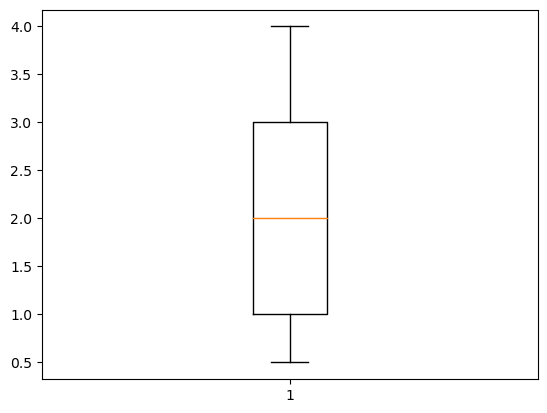

In [294]:
plt.boxplot(df["MOLARITY"])

In [295]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -2.0
Upper outlier limit in cement:  6.0


In [296]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Molarity upper: ', df[df['MOLARITY']>6.0]['MOLARITY'].count())
print('Number of outliers in Molarity lower: ', df[df['MOLARITY']<-2.0]['MOLARITY'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in Molarity upper:  0
Number of outliers in Molarity lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_18044\1542525641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY']).set_title('MOLARITY')


<IPython.core.display.Javascript object>

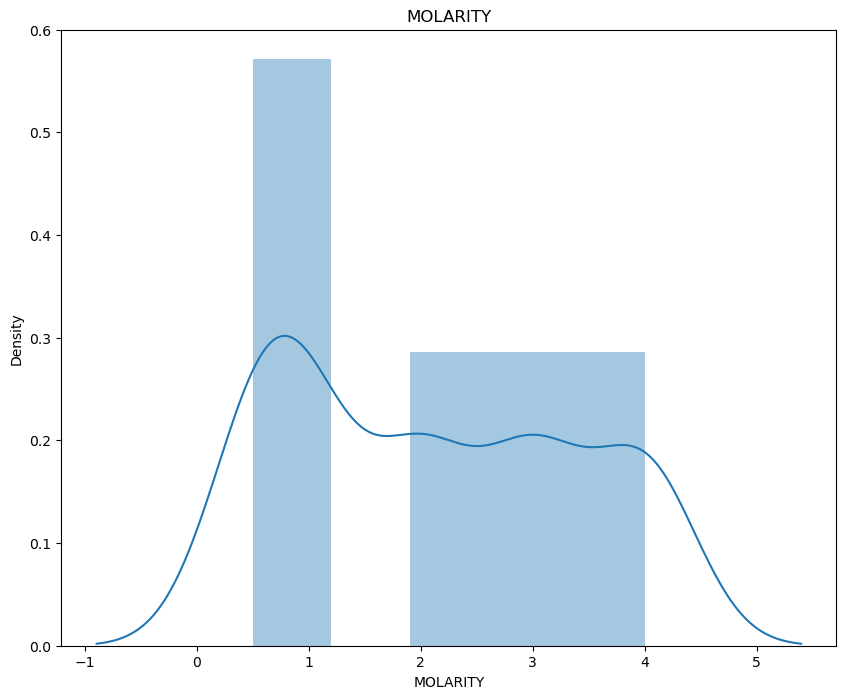

In [297]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY']).set_title('MOLARITY')
plt.show()

## CURING AGE

In [298]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['CURING AGE'].quantile(q=0.25)
Q3=df['CURING AGE'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['CURING AGE']))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  28.0
Interquartile range (IQR) is  21.0


<IPython.core.display.Javascript object>

<Axes: >

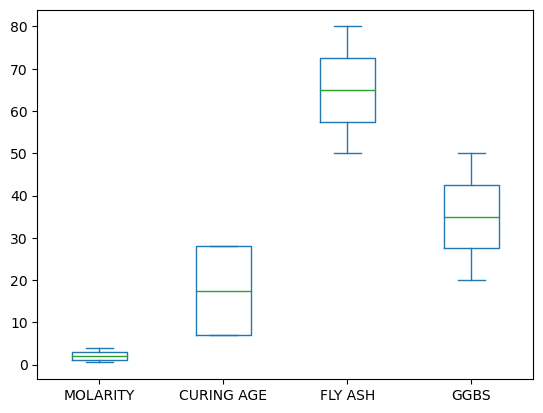

In [299]:
df1=pd.DataFrame(df,columns=["MOLARITY","CURING AGE","FLY ASH","GGBS"])
df1.plot(kind="box")

Thus we see no outliers exist in the data

# Checking Data Distribution 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_18044\173142493.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY'])


<IPython.core.display.Javascript object>

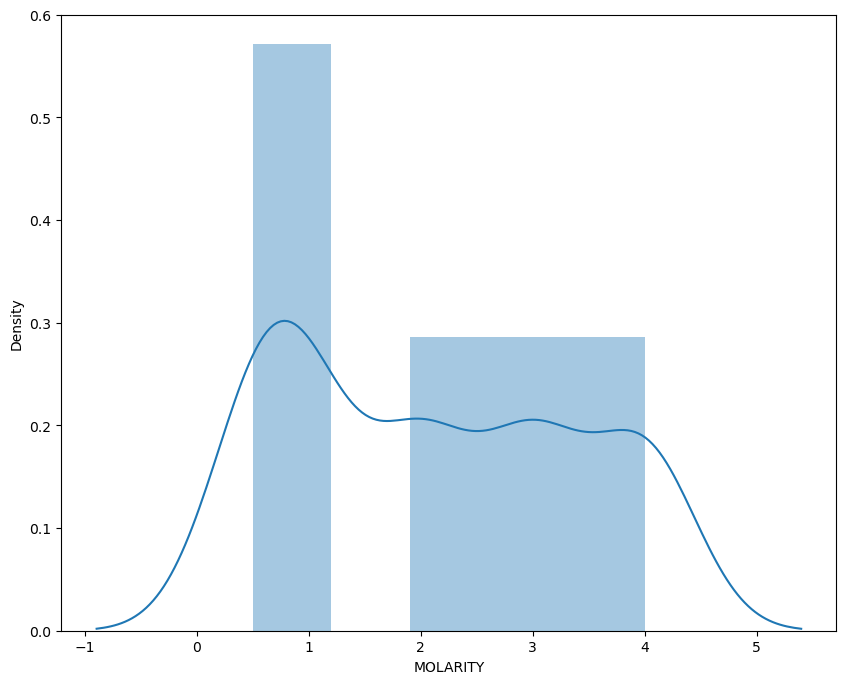

In [300]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_18044\4072669076.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CURING AGE'])


<IPython.core.display.Javascript object>

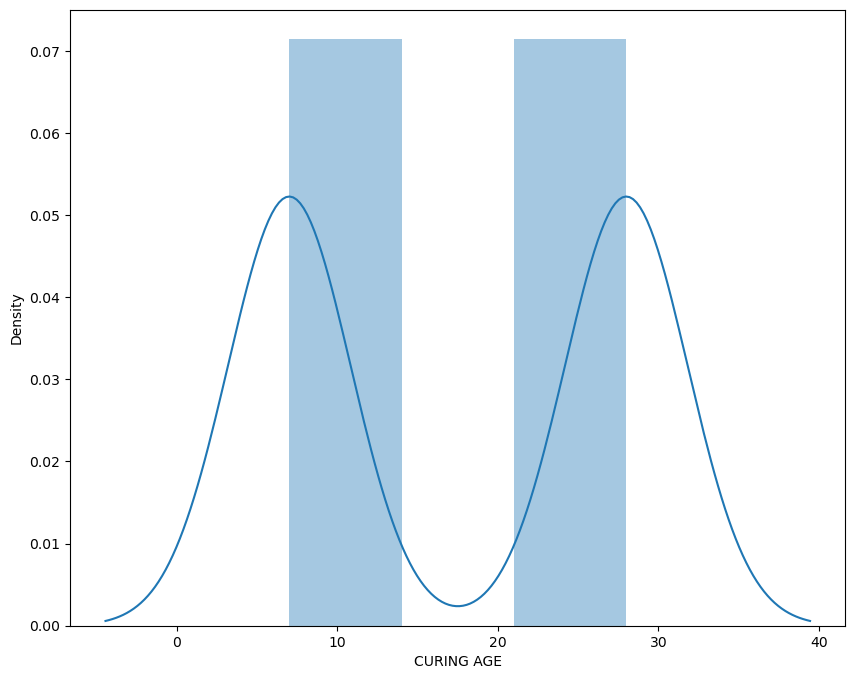

In [301]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['CURING AGE'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_18044\2056115471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FLY ASH'])


<IPython.core.display.Javascript object>

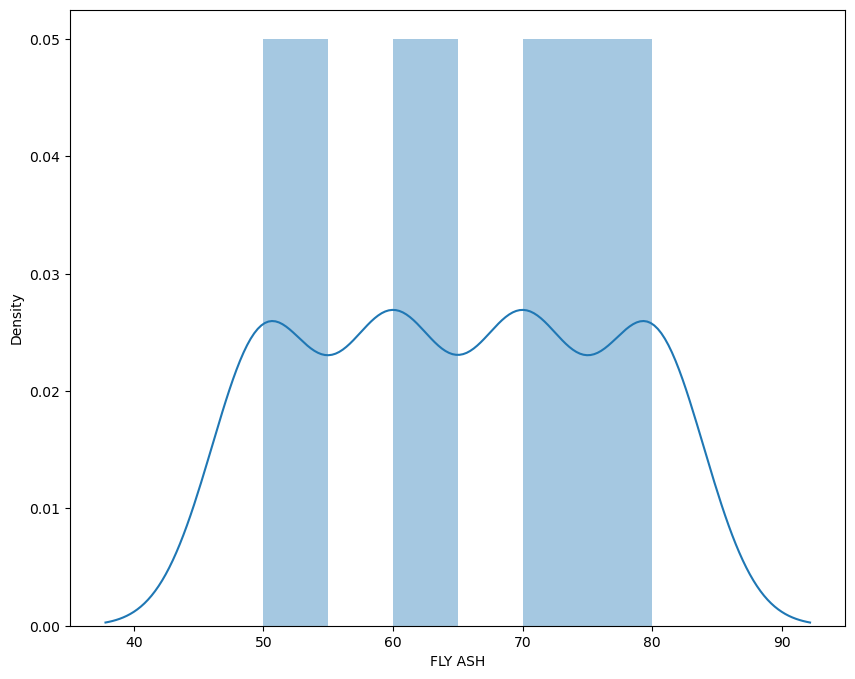

In [302]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['FLY ASH'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_18044\1052900917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GGBS'])


<IPython.core.display.Javascript object>

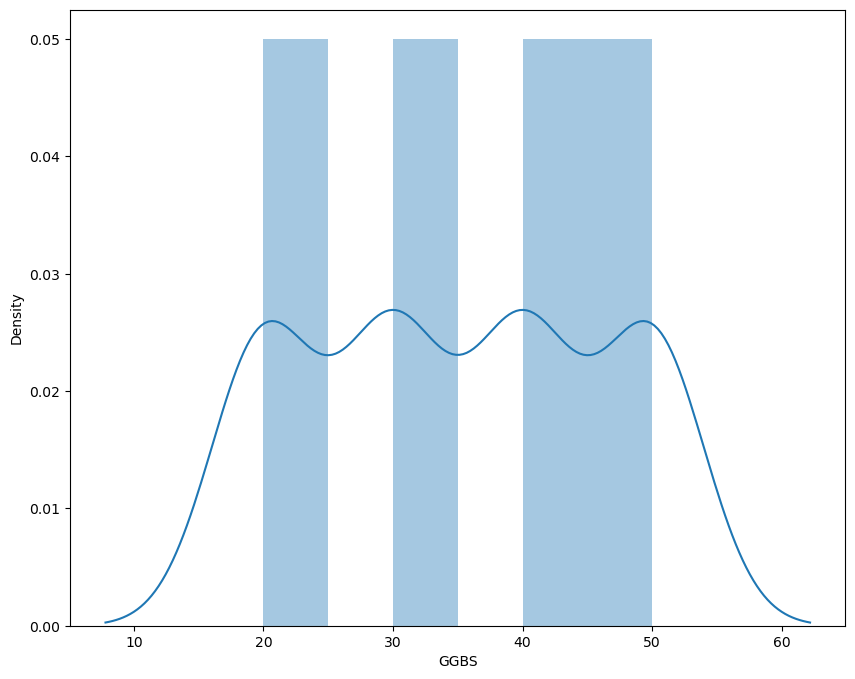

In [303]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['GGBS'])
plt.show()

<IPython.core.display.Javascript object>

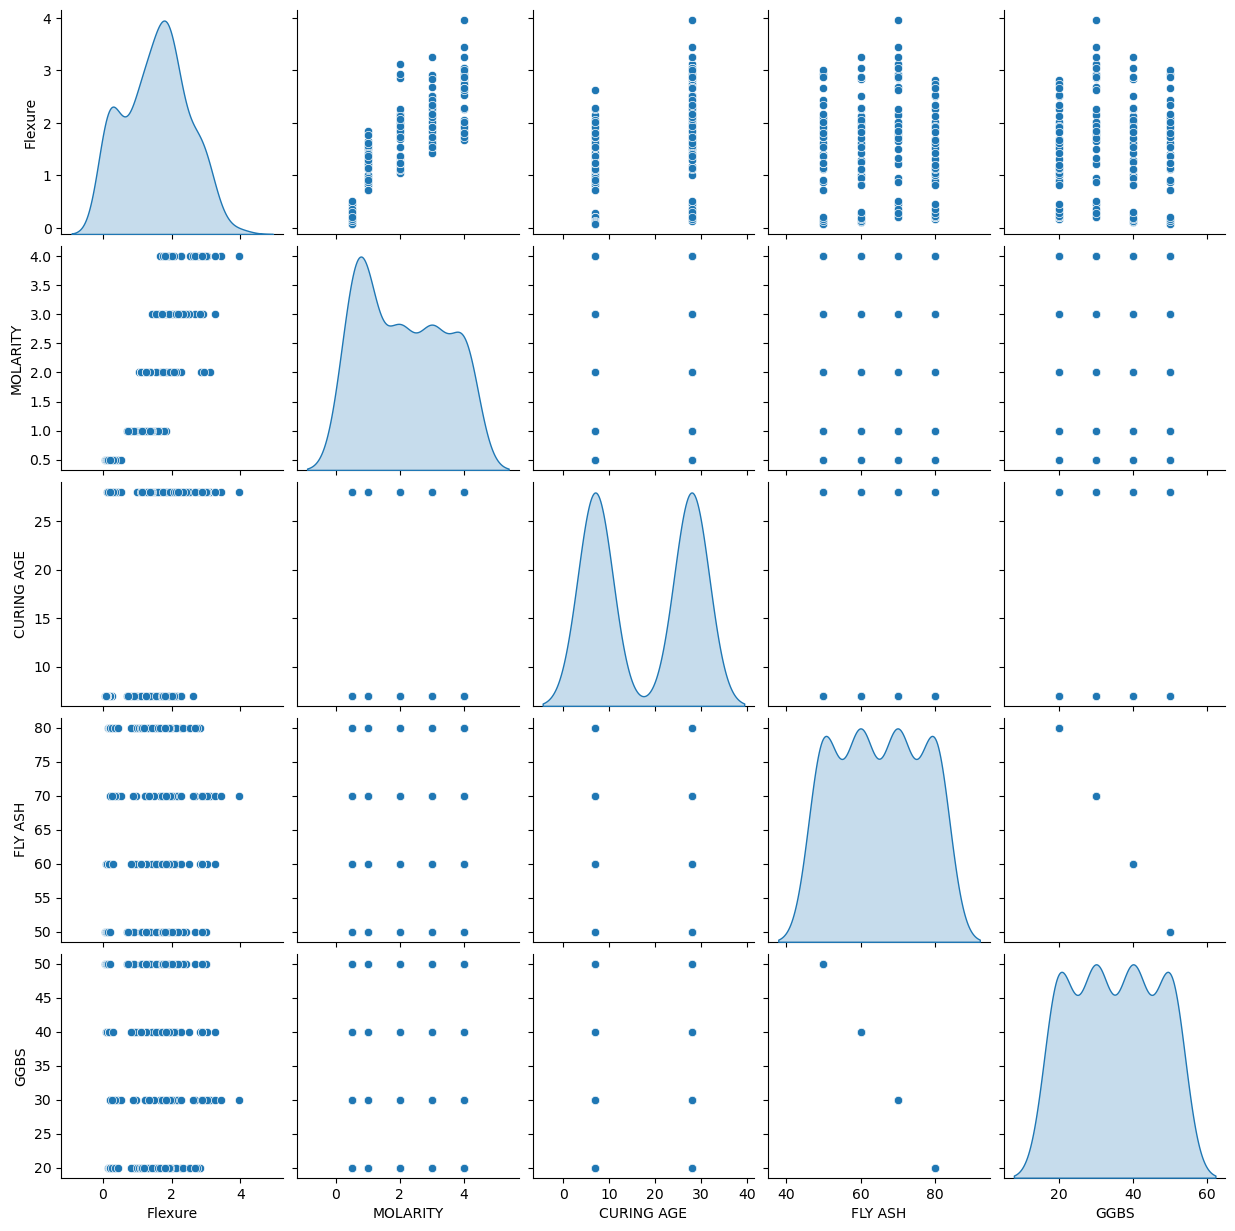

In [304]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

<IPython.core.display.Javascript object>

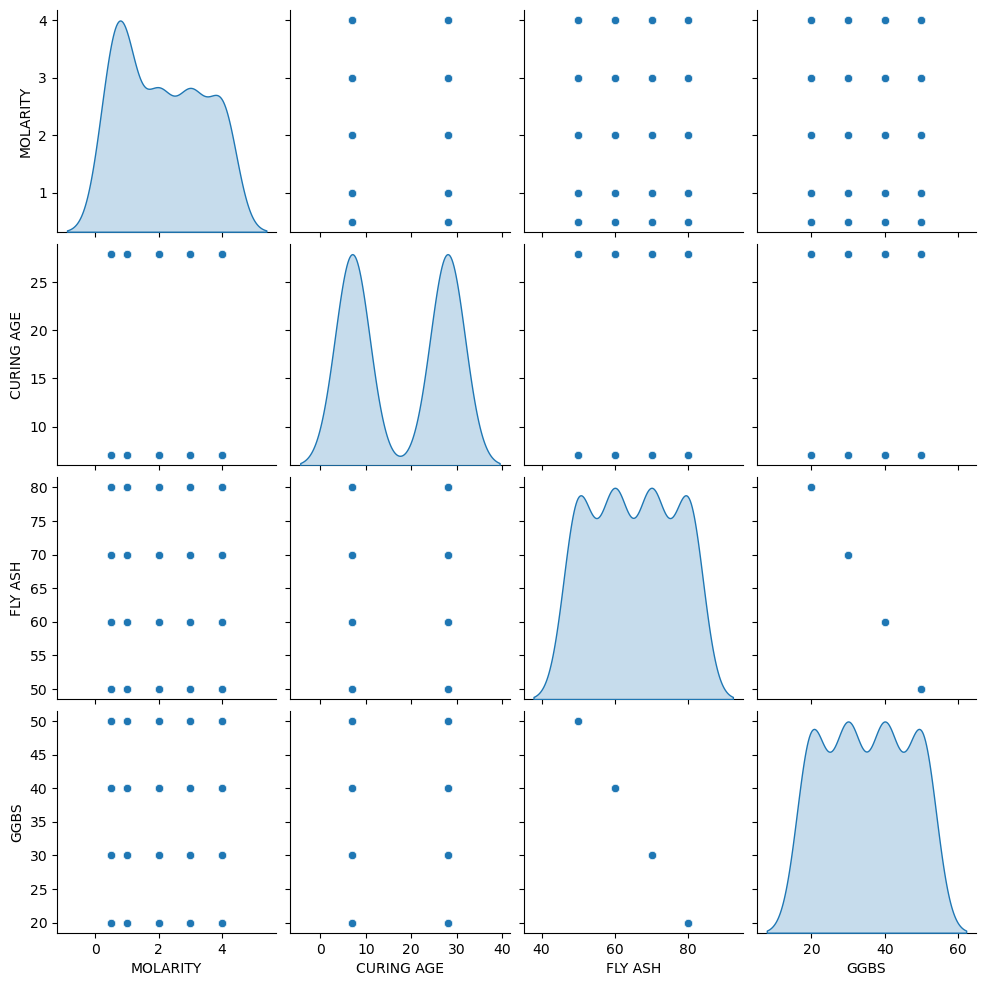

In [305]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df1, diag_kind='kde')

There seems to be a linear relationship between GGBS and FLY ASH while other parameters are independent of each other. Also the parameters seem to assume particular values only rather than being randomly scattered

## Correlation between variables 

In [306]:
sns.set_context("poster",font_scale=.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

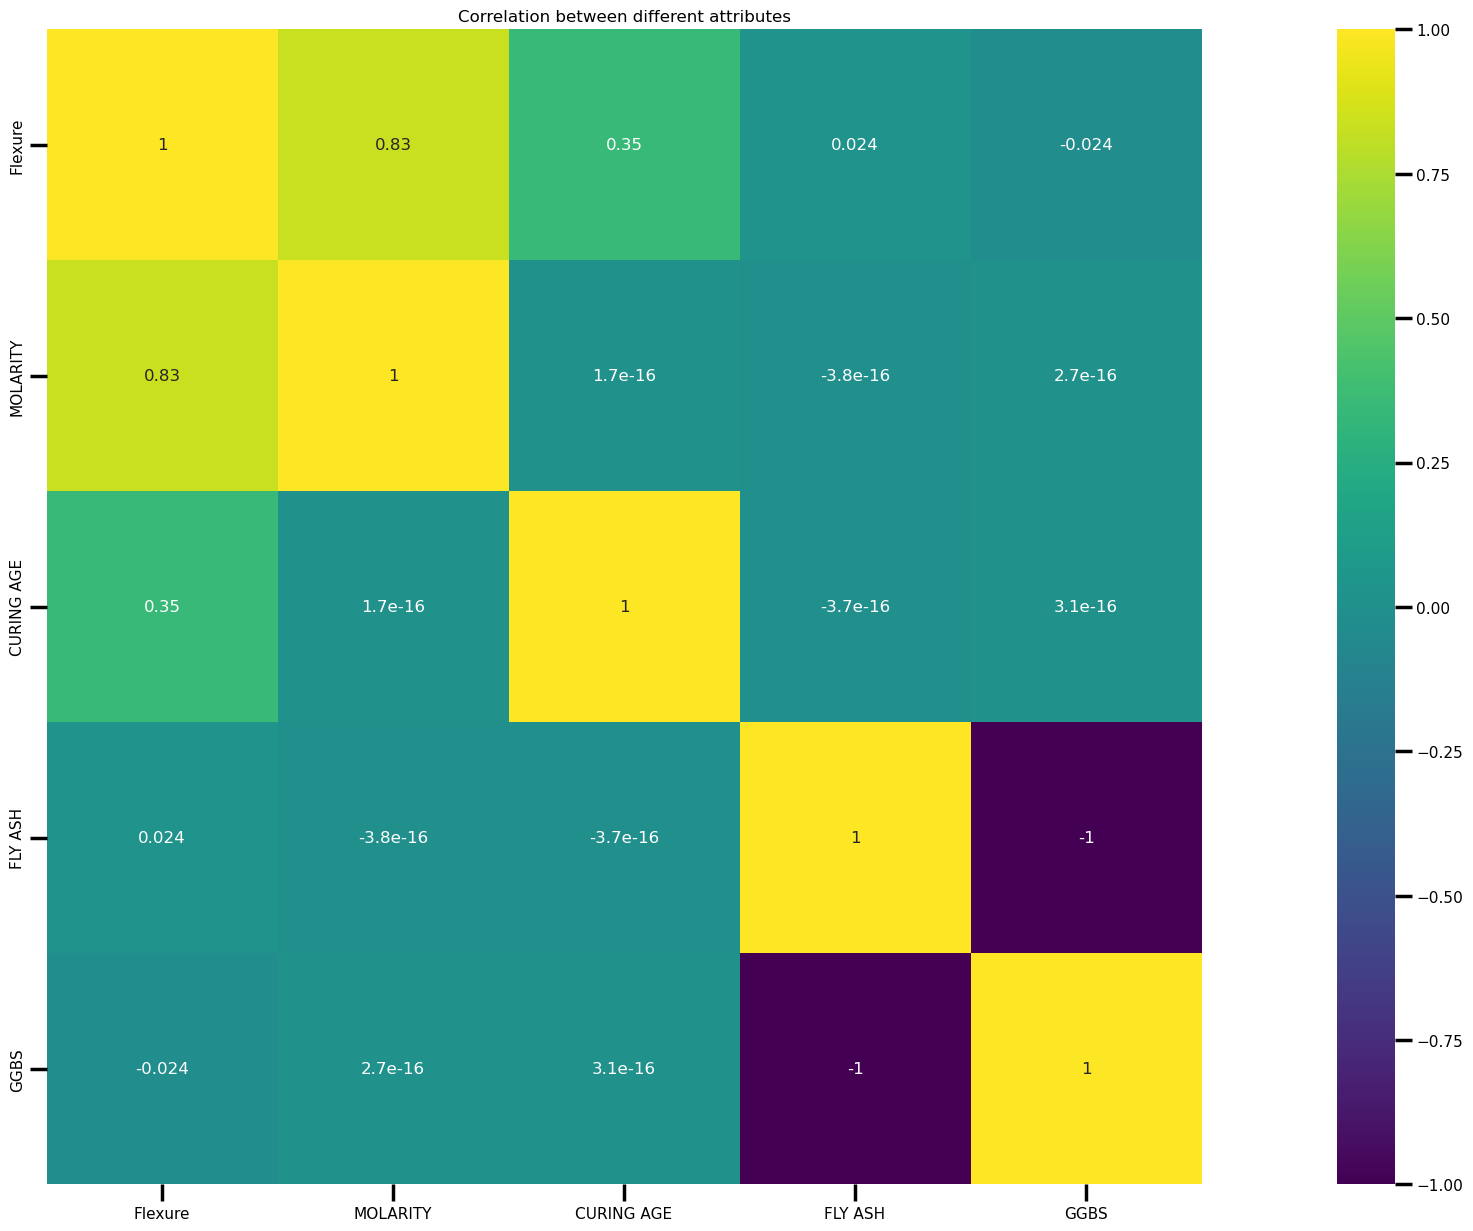

In [307]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

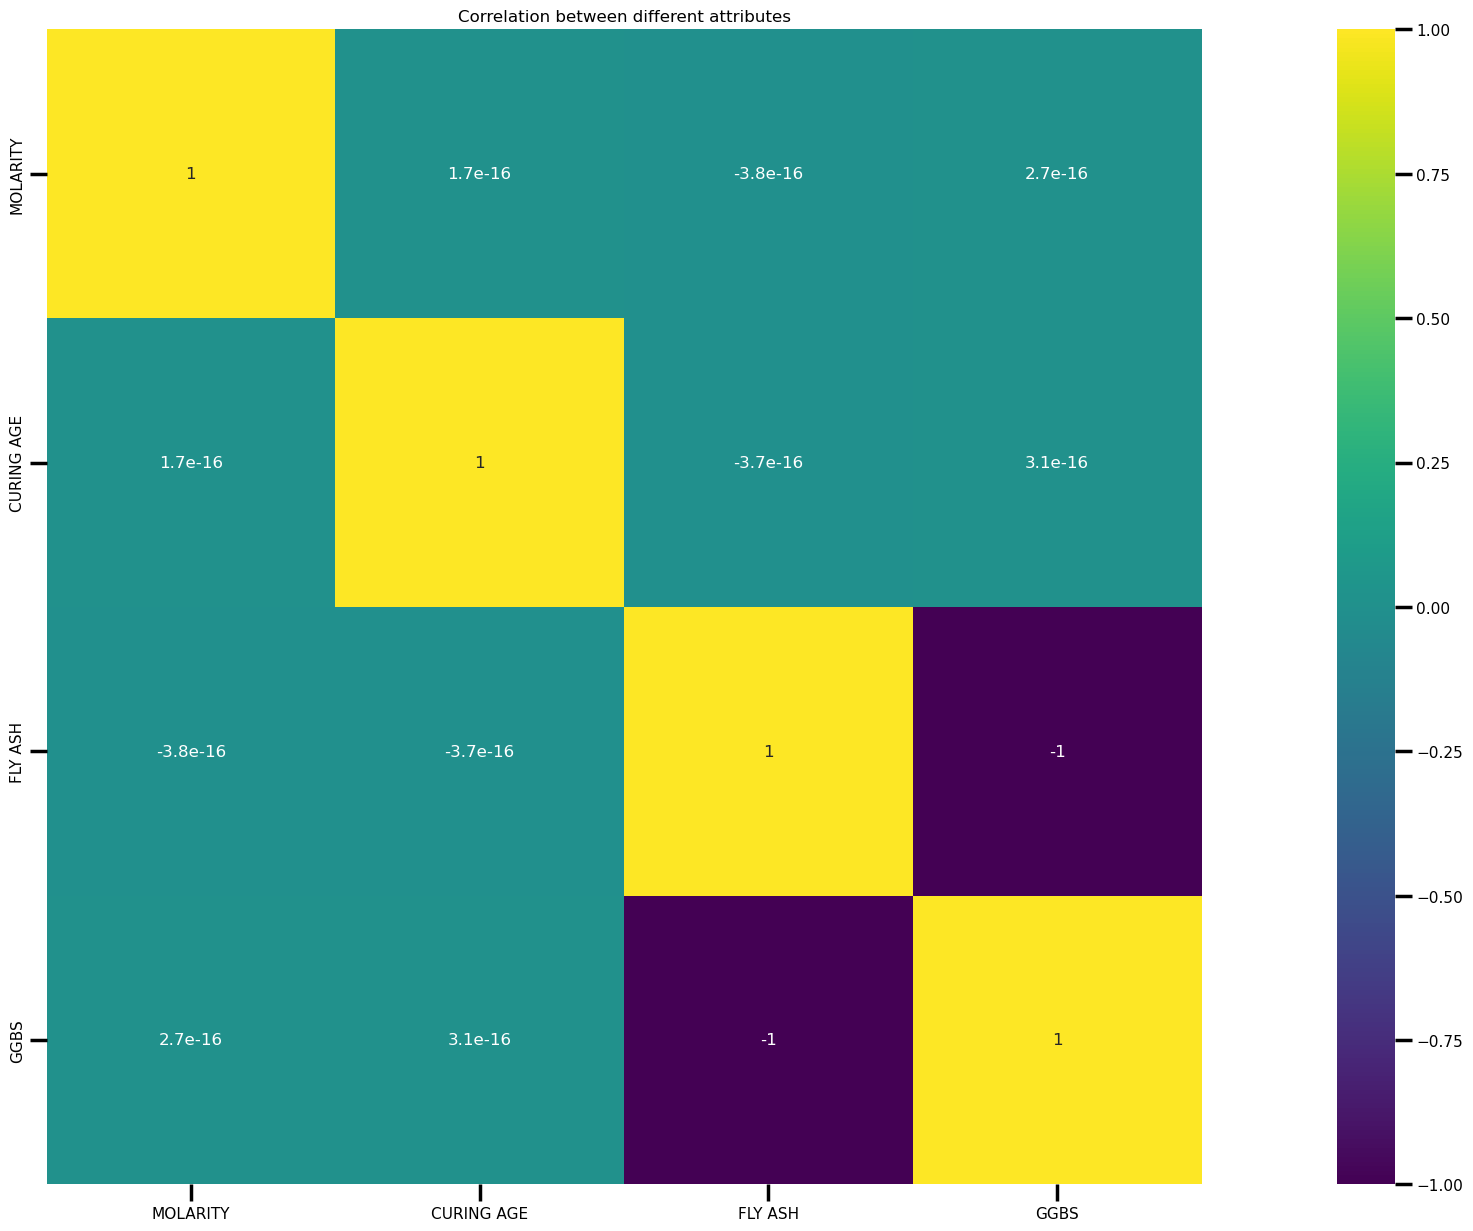

In [308]:
plt.figure(figsize=(35,15))

sns.heatmap(df1.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Thus we have verified our findings.
As GGBS and FLY ASH are perfectly correlated, we can drop one of them, hence lets drop GGBS

In [309]:
X = df.drop(columns=["Flexure","GGBS"], axis = 1)
y = df['Flexure']

In [310]:
X

,MOLARITY,CURING AGE,FLY ASH
0,0.5,7,80
1,0.5,7,80
2,0.5,7,80
3,0.5,7,80
4,0.5,28,80
...,...,...,...
155,4.0,7,50
156,4.0,28,50
157,4.0,28,50
158,4.0,28,50


In [311]:
y

0      0.16456
1      0.16830
2      0.20383
3      0.20196
4      0.22000
        ...   
155    1.81000
156    2.93000
157    2.67000
158    3.01000
159    2.88000
Name: Flexure, Length: 160, dtype: float64

# Predictive Modelling 

In [312]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [313]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

### Random Forest 

In [314]:
#100 n_estimators or tress by default
model=RandomForestRegressor()
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [315]:
y_pred=model.predict(X_test)

In [316]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9735818197976727

In [317]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.8839091593532887

In [318]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.8839091593532887

In [319]:
data = {'Algorithm': 'Random Forest', 'accuracy': acc_R}
data

{'Algorithm': 'Random Forest', 'accuracy': 0.8839091593532887}

In [320]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame(({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]}),index=['1'])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909


### KFold Cross Validation

In [321]:
#we can use stratified k_fold as well
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
K_results=cross_val_score(model,X,y,cv=kfold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [322]:
K_results

array([0.89338958, 0.8466832 , 0.91591294, 0.9559514 , 0.91776092,
       0.96777255, 0.95504264, 0.95455169, 0.94372049, 0.97989159])

In [323]:
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

0.9330676997574571

In [324]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=['2'])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068


## Gradient Boost Regressor 

In [325]:
model=GradientBoostingRegressor()

<IPython.core.display.Javascript object>

In [326]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [327]:
y_pred=model.predict(X_test)

In [328]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9724253521876042

In [329]:
#Model performance on Test Data
acc_G=model.score(X_test,y_test)
acc_G

0.9219555874334814

In [330]:
gradient_re=pd.DataFrame({'Algorithm':'Gradient Boost Regressor','accuracy':acc_G},index=['3'])
results=pd.concat([results,gradient_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956


In [331]:
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
results_3=cross_val_score(model,X,y,cv=kfold)
results_3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.90631203, 0.88182613, 0.91301803, 0.96850436, 0.92332681,
       0.97326286, 0.95748285, 0.96217425, 0.9432137 , 0.97699685])

In [332]:
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

0.9406117873193359

In [333]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=['4'])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612


#### Making function to get score and k_fold score 

In [334]:
def get_score(model):
    model.fit(X_train,y_train)
    print("model score on train data:",model.score(X_train,y_train))
    print("model score on test data:",model.score(X_test,y_test))
    model_score=model.score(X_test,y_test)
    return model_score

In [335]:
# def add_to_df(model_name,model_score,index,results=results):
#     acc=pd.DataFrame({'Algorithms':[str(model_name)],"accuracy":model_score},index=[str(index)])
#     results=pd.concat([results,acc])    
#     results = results[['Algorithm','accuracy']]
#     display(results)

In [336]:
def get_kfold_score(model):
    k=10
    kfold=KFold(n_splits=k,random_state=70,shuffle=True)
    results_4=cross_val_score(model,X,y,cv=kfold)
    print(results_4)
    accuracy=np.mean(results_4)
    print("kfold accuracy:",accuracy)
    return accuracy

## Ada Boost 

In [337]:
from sklearn.ensemble import AdaBoostRegressor

In [338]:
model_score=get_score(AdaBoostRegressor())

model score on train data: 0.9294160355914859
model score on test data: 0.8670583376980562


In [339]:
kfold_score=get_kfold_score(AdaBoostRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.68900799 0.82072006 0.88146491 0.90466145 0.88309621 0.94753436
 0.941576   0.95601895 0.89797338 0.90497173]


<IPython.core.display.Javascript object>

kfold accuracy: 0.882702504696885


In [340]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': model_score},index=['5'])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058


In [341]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': kfold_score},index=['6'])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703


## KNN Regressor 

In [342]:
X.shape

(160, 3)

In [343]:
#checking for the best k
from sklearn.neighbors import KNeighborsRegressor

acc_k=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    acc_k.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Model Score')

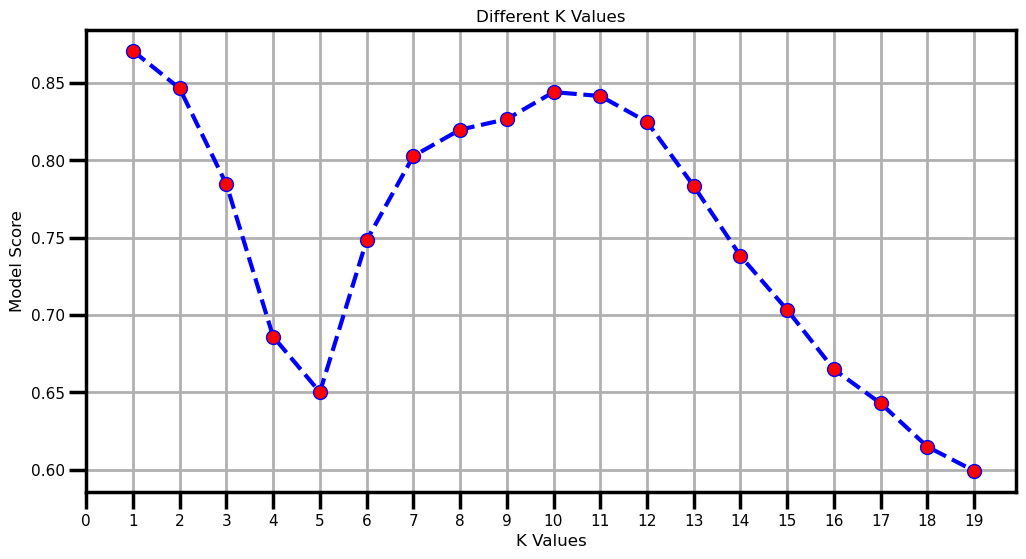

In [344]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),acc_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid()
plt.xticks(np.arange(0,20))
# plt.yticks(np.arange(0,2,.1))
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Model Score')

2 seems a good choice for k

In [345]:
model_score=get_score(KNeighborsRegressor(n_neighbors=2))

model score on train data: 0.9654044638629299
model score on test data: 0.8464828004998826


In [346]:
kfold_score=get_kfold_score(KNeighborsRegressor(n_neighbors=2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.87807172 0.81151566 0.89771753 0.97248484 0.90823889 0.97137108
 0.90379963 0.92922678 0.94237503 0.9721682 ]


<IPython.core.display.Javascript object>

kfold accuracy: 0.918696936946813


In [347]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [model_score]}, index=['7'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483


In [348]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': kfold_score},index=['8'])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697


## Bagging Regressor 

In [349]:
from sklearn.ensemble import BaggingRegressor

In [350]:
model_score=get_score(BaggingRegressor())

model score on train data: 0.9724501781127166
model score on test data: 0.8942802791025658


In [351]:
kfold_score=get_kfold_score(BaggingRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.87706816 0.83413272 0.90980793 0.96843978 0.91968697 0.97634235
 0.95995142 0.96938629 0.94279894 0.97130671]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9328921283524523


In [352]:
Bagging_df=pd.DataFrame({"Algorithm":"Bagging Regressor","accuracy":model_score},index=['9'])
results=pd.concat([results,Bagging_df])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280


In [353]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=['10'])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


## Support Vector Regressor 

In [354]:
from sklearn.svm import SVR
model=SVR(kernel="linear")

In [355]:
model_score=get_score(model)

model score on train data: 0.8311923580266584
model score on test data: 0.7275254516864201


In [356]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.70761445 0.83369769 0.67480732 0.87976918 0.75769849 0.77975746
 0.6502809  0.92194416 0.81001196 0.74384466]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7759426258175873


In [357]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor','Support Vector Regressor k fold'], 'accuracy':[model_score,kfold_score]},index=['11','12'])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


## XGBoost Regressor 

In [358]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [359]:
xgr=XGBRegressor()

In [360]:
model_score=get_score(xgr)

model score on train data: 0.9745685348407215
model score on test data: 0.887305977621868


In [361]:
kfold_score=get_kfold_score(xgr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.89668106 0.827327   0.90895425 0.96627039 0.92337256 0.96627024
 0.95528094 0.95338597 0.945574   0.98040963]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9323526034127487


In [362]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor','XGBoost Regressor k_fold'], 'accuracy': [model_score,kfold_score]},index=['13','14'])
results = pd.concat([results, XGB_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


## Decision Tree Regressor 

In [363]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [364]:
print('Feature Importance: \n',pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns]))

<IPython.core.display.Javascript object>

Feature Importance: 
             Importance
MOLARITY      0.783775
CURING AGE    0.161773
FLY ASH       0.054451


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

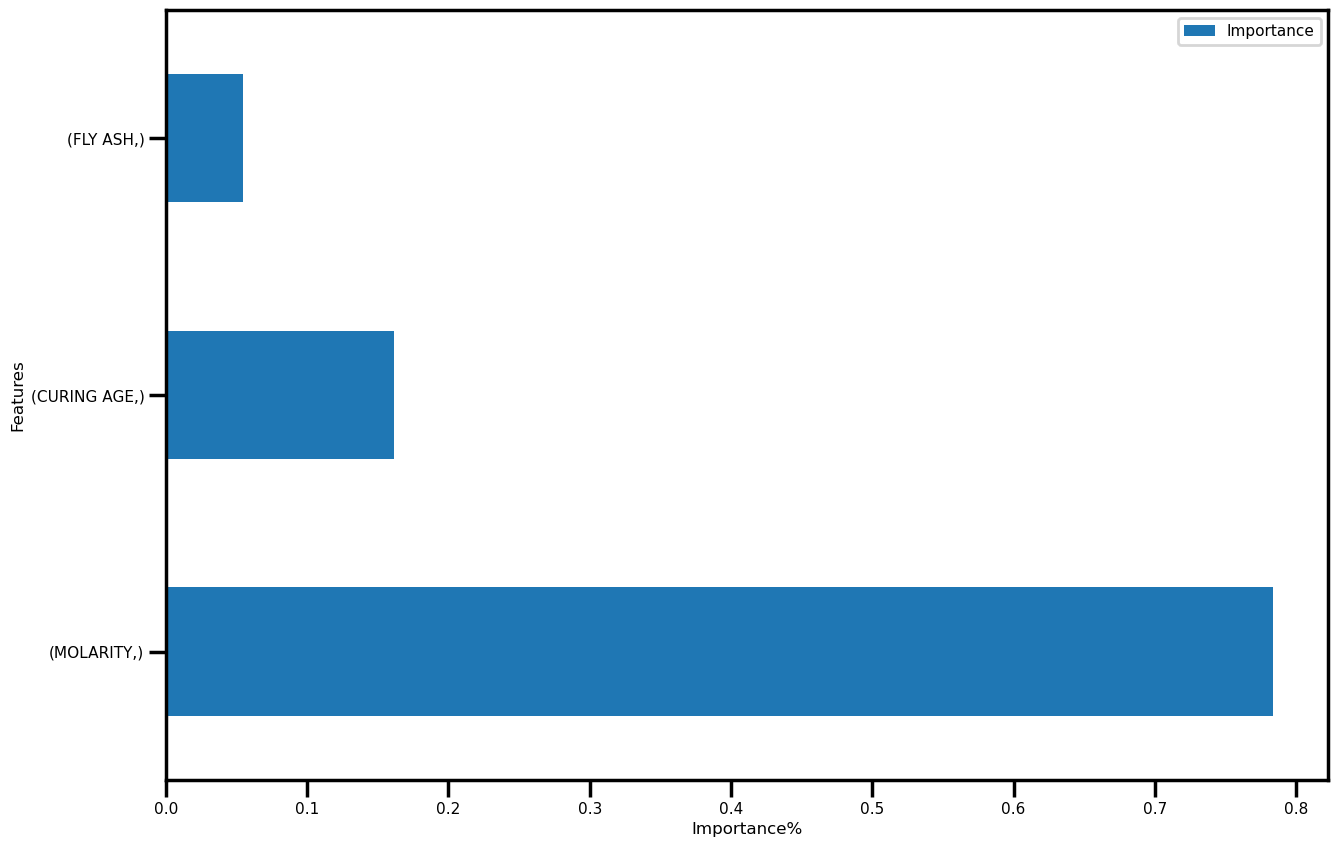

In [365]:
df_featureimp=pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns])
df_featureimp.plot(kind="barh",figsize=(15,10))
plt.xlabel("Importance%")
plt.ylabel("Features")
plt.yticks=[X_train.columns]

Thus we can observe that <b>MOLARITY</b> is the most import feature in prediction

In [366]:
model_score=model.score(X_test,y_test)
model_score

0.8870200285052714

In [367]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.89622827 0.82678734 0.90835235 0.96628736 0.9233477  0.9659713
 0.95552515 0.95332395 0.94563234 0.98038193]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9321837682285132


In [368]:
DT_df=pd.DataFrame({'Algorithm':['Decision Tree Regressor 1','Decision Tree Regressor 1 k_fold'],'accuracy':[model_score,kfold_score]},index=['15','16'])
results=pd.concat([results,DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


# Feature Selection

In [369]:
df

,Flexure,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20
...,...,...,...,...,...
155,1.81000,4.0,7,50,50
156,2.93000,4.0,28,50,50
157,2.67000,4.0,28,50,50
158,3.01000,4.0,28,50,50


In [370]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [371]:
X1 = df2.drop(['Flexure','FLY ASH','GGBS'],axis=1)
y1 = df2['Flexure']
#Split the X1 and y1 into training and test set in 70:30 ratio
X1_train,X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [372]:
X1_train = X1_train.apply(zscore)
X1_test = X1_test.apply(zscore)

## Decision Tree Regressor 2

In [373]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [374]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X1_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
             Importance
MOLARITY      0.829017
CURING AGE    0.170983


In [375]:
model_score=decNew_Model.score(X1_train, y1_train)
model_score

0.9220771107957222

In [376]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': model_score},index=['17'])
results = pd.concat([results, DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


In [377]:
k = 10

kfold = KFold(n_splits=k, random_state=70,shuffle= True)
results_9 = cross_val_score(decNew_Model, X1, y1, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.892231444439811

In [378]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2 k_fold'], 'accuracy': accuracy},index=['18'])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


## Pruned Decision Tree Regressor 

In [379]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)

In [380]:
model_score=get_score(dec_prun_model)

model score on train data: 0.9311136471014364
model score on test data: 0.8355251652118423


In [381]:
kfold_score=get_kfold_score(dec_prun_model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.68351125 0.78149371 0.91862157 0.89683086 0.81906155 0.97085294
 0.89781378 0.94753917 0.88458513 0.89763954]


<IPython.core.display.Javascript object>

kfold accuracy: 0.8697949495051797


In [382]:
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [383]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
             Importance
MOLARITY      0.813102
CURING AGE    0.169324
FLY ASH       0.017574


### Plotting the Decision Tree 

In [384]:
!pip install graphviz

In [385]:
!pip install pydot

In [386]:
!pip install six

In [387]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [388]:
Xscaled2_df=Xscaled_df.drop(['Flexure','GGBS'],axis=1)
feature_cols = Xscaled2_df.columns

In [389]:
feature_cols

Index(['MOLARITY', 'CURING AGE', 'FLY ASH'], dtype='object')

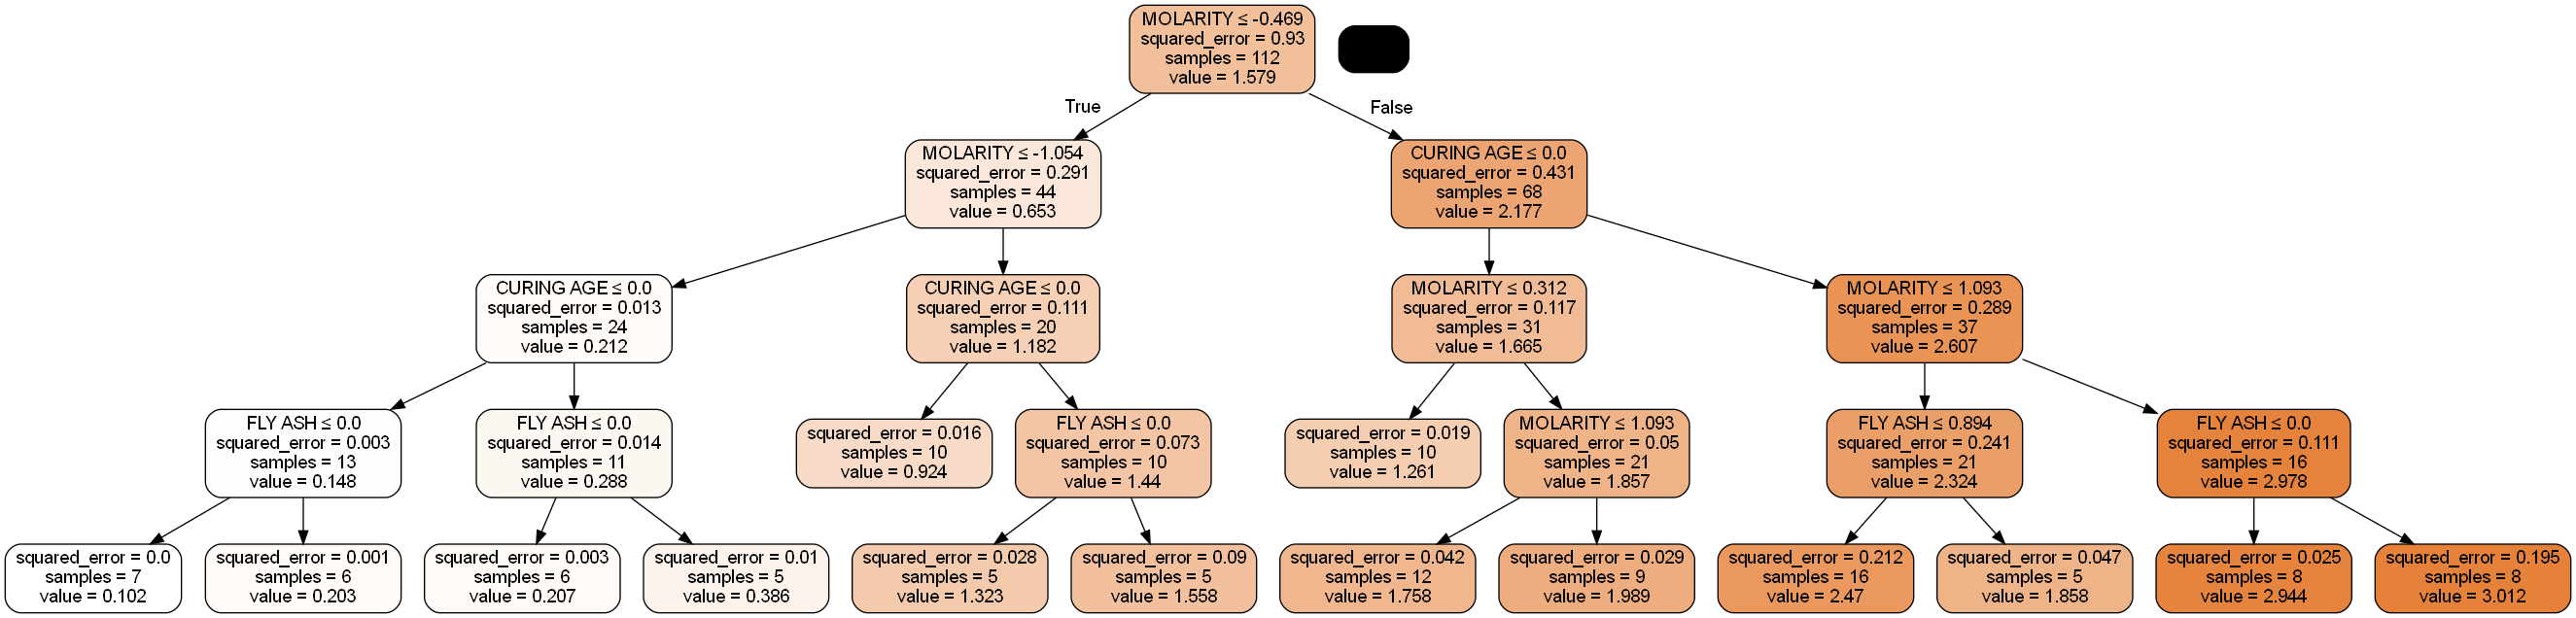

In [390]:
dot_data=StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,
               feature_names=feature_cols,class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FLEXURE_pruned.png')
Image(graph.create_png())

In [391]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree','Pruned Decision Tree k_fold'], 'accuracy': [model_score,kfold_score]},index=['19','20'])
results = pd.concat([results, DecT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


Considering k_fold scores as more accountable...our best models are:
Random Forest,Gradient Boost,Bagging,XGBoost,Decision Tree 1

<b>Gradient Boost Regressor, Bagging Regressor, Random Forest Regressor</b> are the best models for modelling Flexure and following up <b> KNN Regressor, XGBoost Regressor, Decision Tree Regressor1 (i.e. over every feature),Decision Tree Regressor 2(i.e. selected features) </b> are also decently good. We could work with any of the above.

# Regression using ANN 

## Hyperparameter Tuning

In [392]:
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test)
           
            y_pred=np.array(y_pred[:][:])
            y_test=np.reshape(y_test,(-1,1))
            err=abs(y_test-y_pred)
            err/=y_test
            MAPE=np.mean(err)*100
#             MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData,pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 44.000238244538934
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 52.83037616269352
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 74.08053012846082
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 81.63153869608757
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 22.49684421645584
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 49.5293325487625
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 69.81017492363476
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 77.19145034791329
2/2 [==============================] - 0s 6ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 24.516328448120717
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 44.76260663624409
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 66.86696950714378
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 84.7071117613071
2/2 [==============================] - 0s 7ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 27.433057700082543
2/2 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 15.948242385461057
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 66.81215747959462
2/2 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 65.33004386144721


### Choosing best parameters

We can even use <b>keras tuner</b> to optimise the no. of hidden layers and learning rate

<Axes: xlabel='Parameters'>

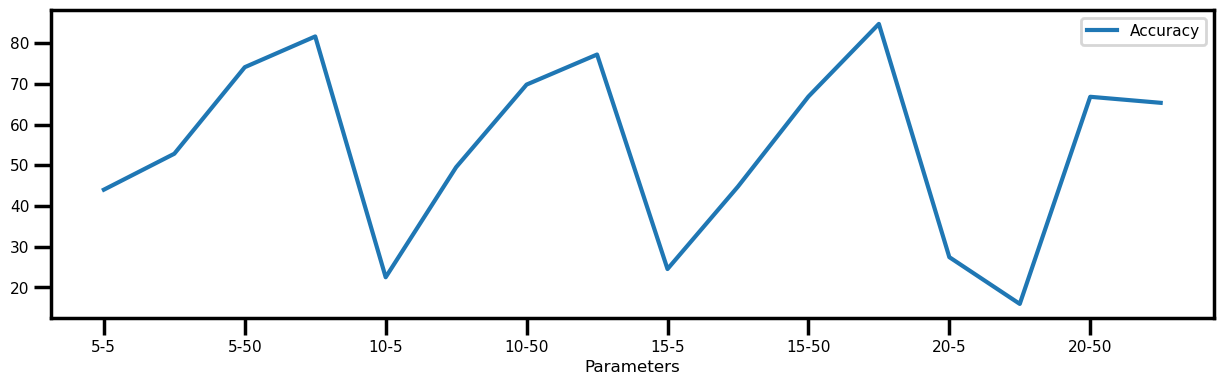

In [393]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Regressor with optimized parameters 

In [394]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=128,kernel_initializer="normal",activation="relu"))
model.add(Dense(units=64,kernel_initializer="normal",activation="tanh"))
model.add(Dense(1,kernel_initializer="normal"))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,batch_size=5,epochs=50,verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 3ms/step - loss: 2.8180
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.1384
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3166
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2310
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.2049
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1924
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1712
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1621
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1387
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 0.1298
Epoch 13/50
23/23 [==============================

In [395]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [396]:
acc_ANN=metrics.r2_score(y_test,y_pred)
acc_ANN

<IPython.core.display.Javascript object>

0.8878254832140803

In [397]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

0.061362075492560474

In [398]:
ANN_re = pd.DataFrame({'Algorithm': ['ANN Manually Tuned'], 'accuracy': acc_ANN},index=['21'])
results = pd.concat([results, ANN_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


# Regression with Sklearn ANN or MLP(Multi-Layer Perceptron) 

In [399]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [400]:
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

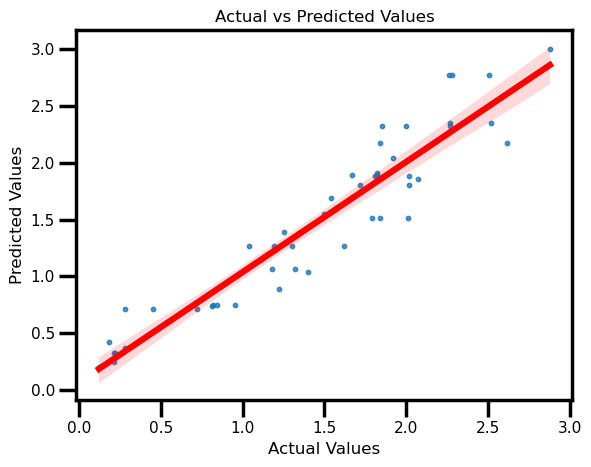

In [401]:
# Predict values for testing set
y_pred = model.predict(X_test)

# Create regression plot with actual and predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

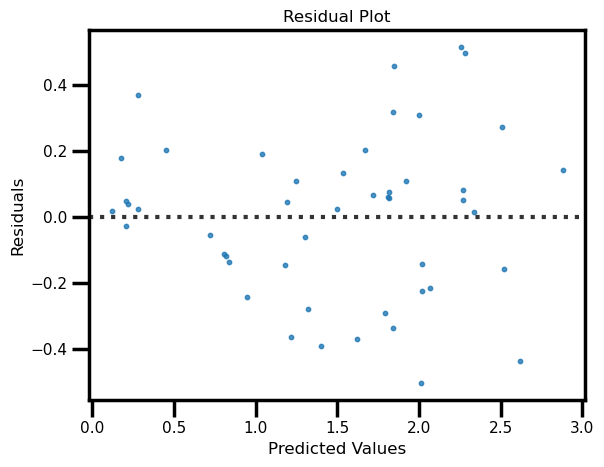

In [402]:
# Create residual plot with actual and predicted values
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [403]:
model_score=model.score(X_test,y_test)
model_score

0.8911056074935116

In [404]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[-6.82564193  0.1307172   0.85111182  0.91460186  0.89260153  0.91833503
  0.92860701  0.88946838  0.8607185   0.83318722]


<IPython.core.display.Javascript object>

kfold accuracy: 0.03937066287982434


In [405]:
gradient_re = pd.DataFrame({'Algorithm': ['ANN:Scikit-Learn MLP','ANN:Scikit-Learn MLP k_fold'], 'accuracy': [model_score,kfold_score]},index=['22','23'])
results = pd.concat([results, gradient_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.883909
2,Random Forest Regressor k_fold,0.933068
3,Gradient Boost Regressor,0.921956
4,Gradient Boost Regressor k fold,0.940612
5,Ada Boost Regressor,0.867058
6,Ada Boost Regressor k fold,0.882703
7,KNN Regressor,0.846483
8,KNN Regressor k fold,0.918697
9,Bagging Regressor,0.894280
10,Bagging Regressor k fold,0.940612


Thus we see that the <b>MLP(ANN)</b> is also performing good on the test data but yields poor kfold accuracy

# Plotting

In [406]:
df

,Flexure,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20
...,...,...,...,...,...
155,1.81000,4.0,7,50,50
156,2.93000,4.0,28,50,50
157,2.67000,4.0,28,50,50
158,3.01000,4.0,28,50,50


## Actual vs Prediction Plots

In [407]:
import matplotlib.pyplot as plt
plt.rcdefaults()

SMALL_SIZE = 22
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Type 1 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

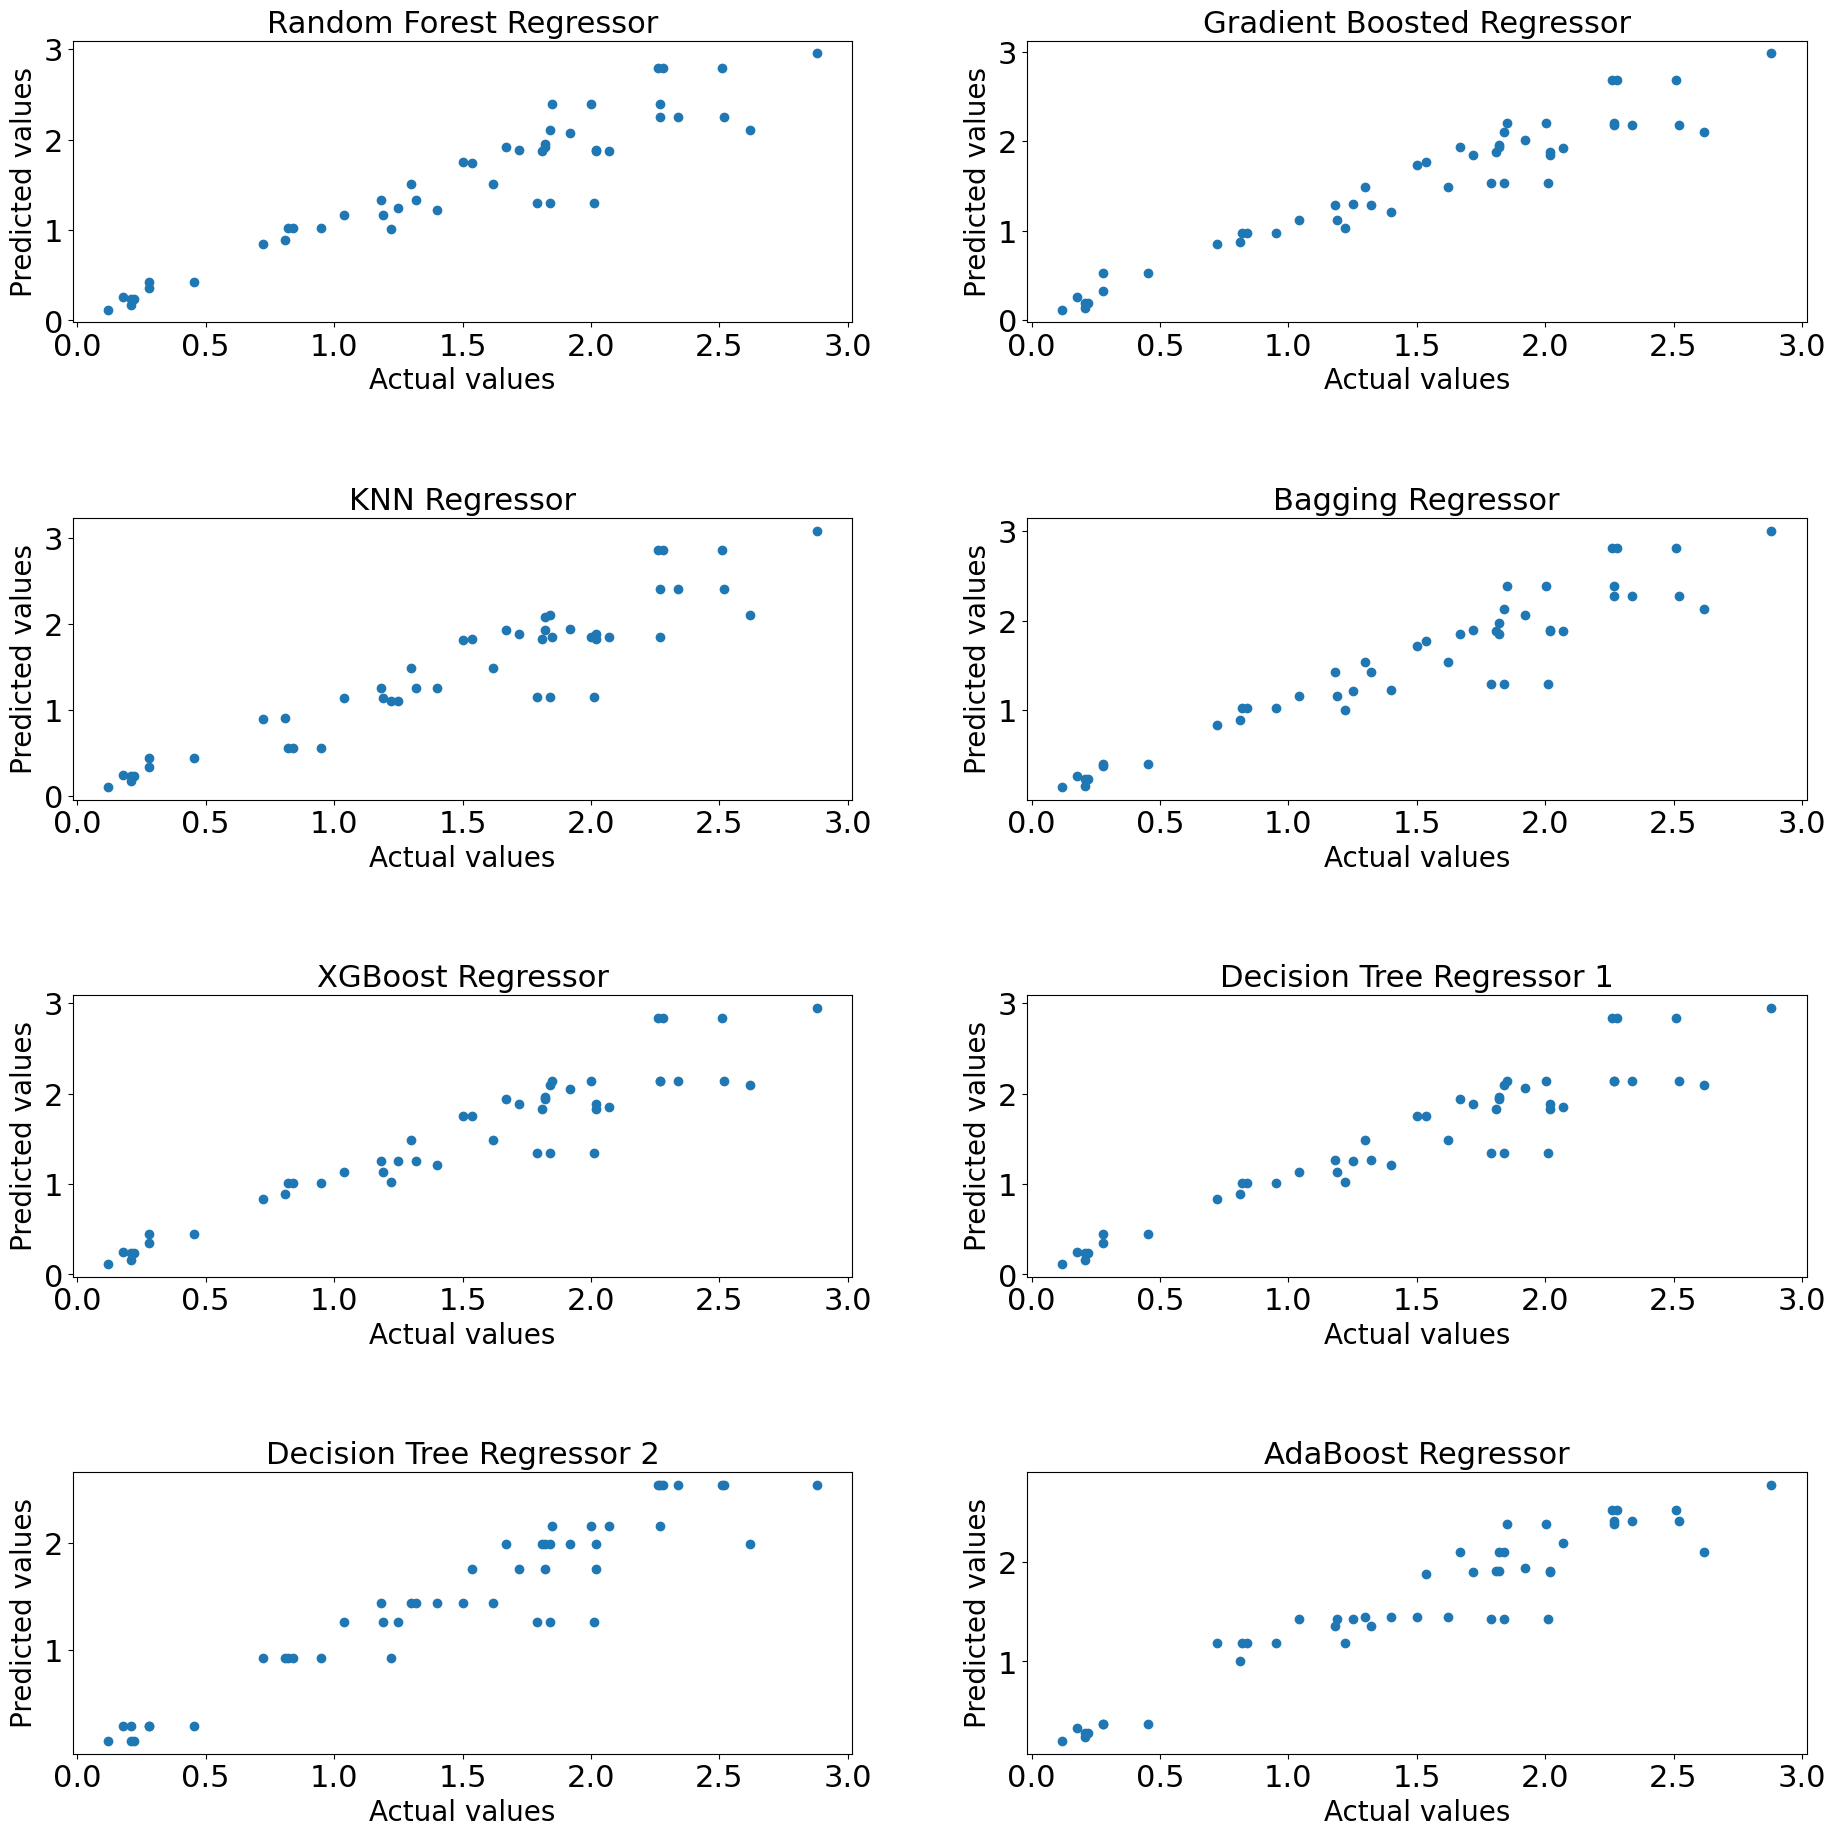

In [408]:
plt.clf()
fig,ax=plt.subplots(4,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ax[0,0].scatter(y_test,y_pred)
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
ax[0,1].scatter(y_test,y_pred)
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[1,0].scatter(y_test,y_pred)
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,1].scatter(y_test,y_pred)
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[2,0].scatter(y_test,y_pred)
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[2,1].scatter(y_test,y_pred)
ax[2,1].set_title("Decision Tree Regressor 1")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model7=DecisionTreeRegressor()
model7.fit(X1_train, y1_train)
y1_pred=model7.predict(X1_test)
ax[3,0].scatter(y1_test,y1_pred)
ax[3,0].set_title("Decision Tree Regressor 2")
ax[3,0].set_xlabel("Actual values")
ax[3,0].set_ylabel("Predicted values")

model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
ax[3,1].scatter(y_test,y_pred)
ax[3,1].set_title("AdaBoost Regressor")
ax[3,1].set_xlabel("Actual values")
ax[3,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)


## Plot type 2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

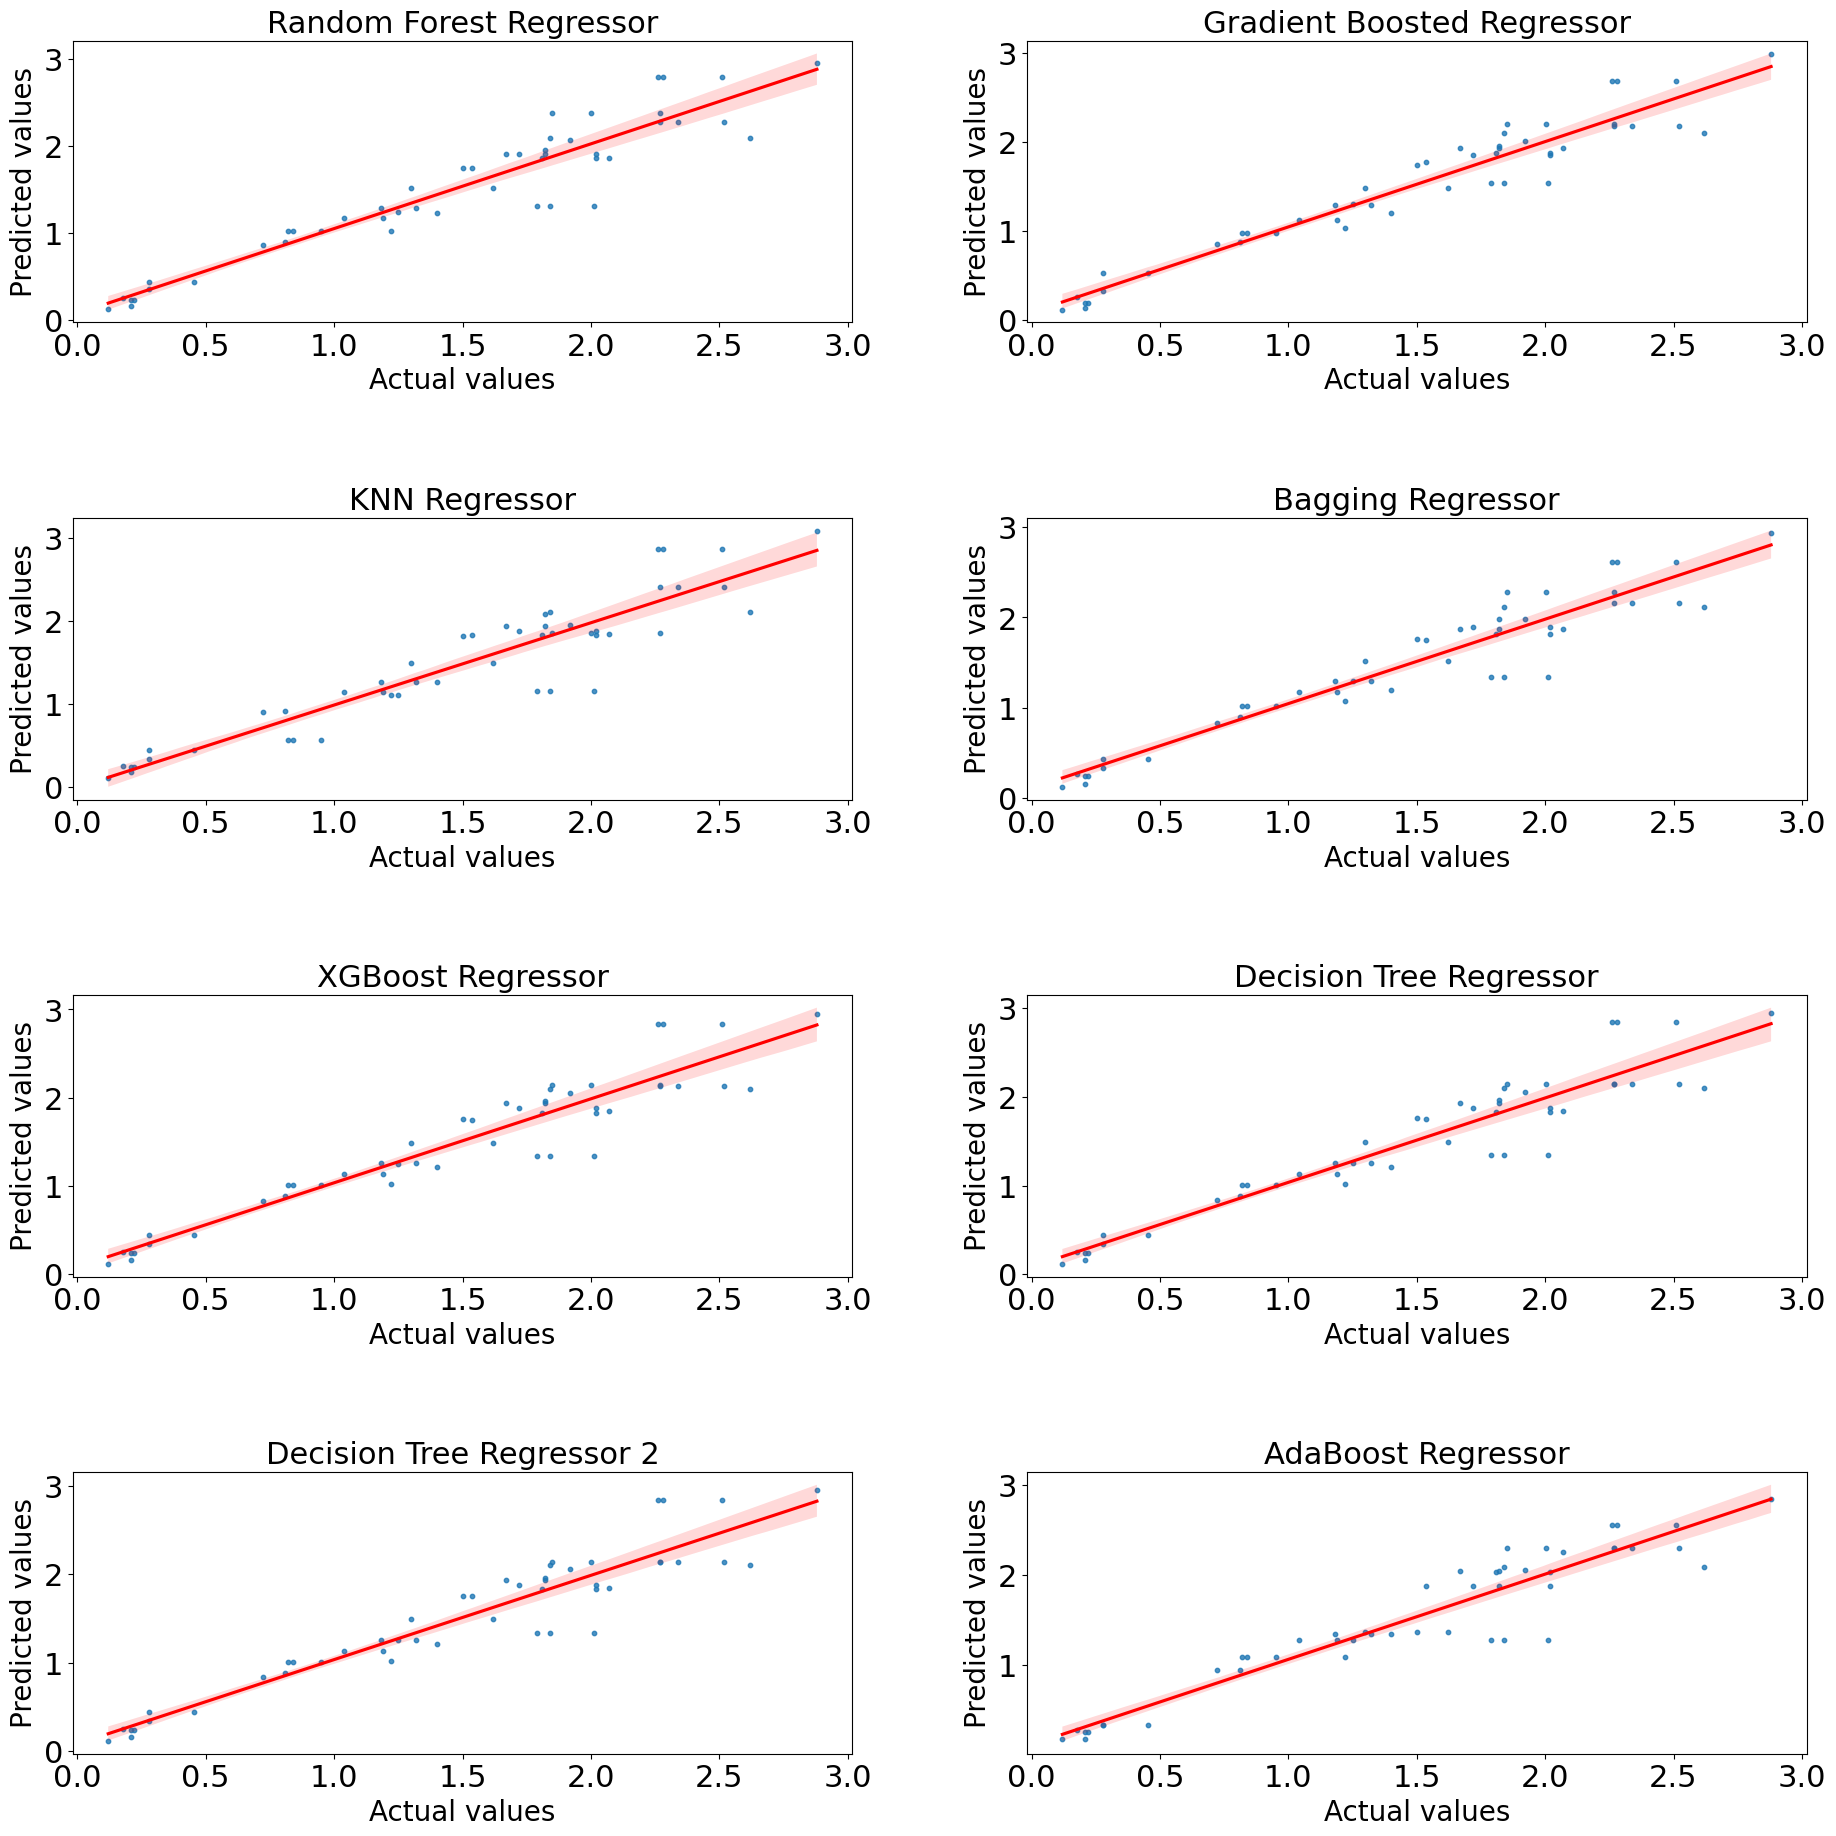

In [409]:
plt.clf()
import seaborn as sns
fig,ax=plt.subplots(4,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model7=DecisionTreeRegressor()
model7.fit(X1_train, y1_train)
y1_pred=model7.predict(X1_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[3,0])
ax[3,0].set_title("Decision Tree Regressor 2")
ax[3,0].set_xlabel("Actual values")
ax[3,0].set_ylabel("Predicted values")

model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[3,1])
ax[3,1].set_title("AdaBoost Regressor")
ax[3,1].set_xlabel("Actual values")
ax[3,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 3 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

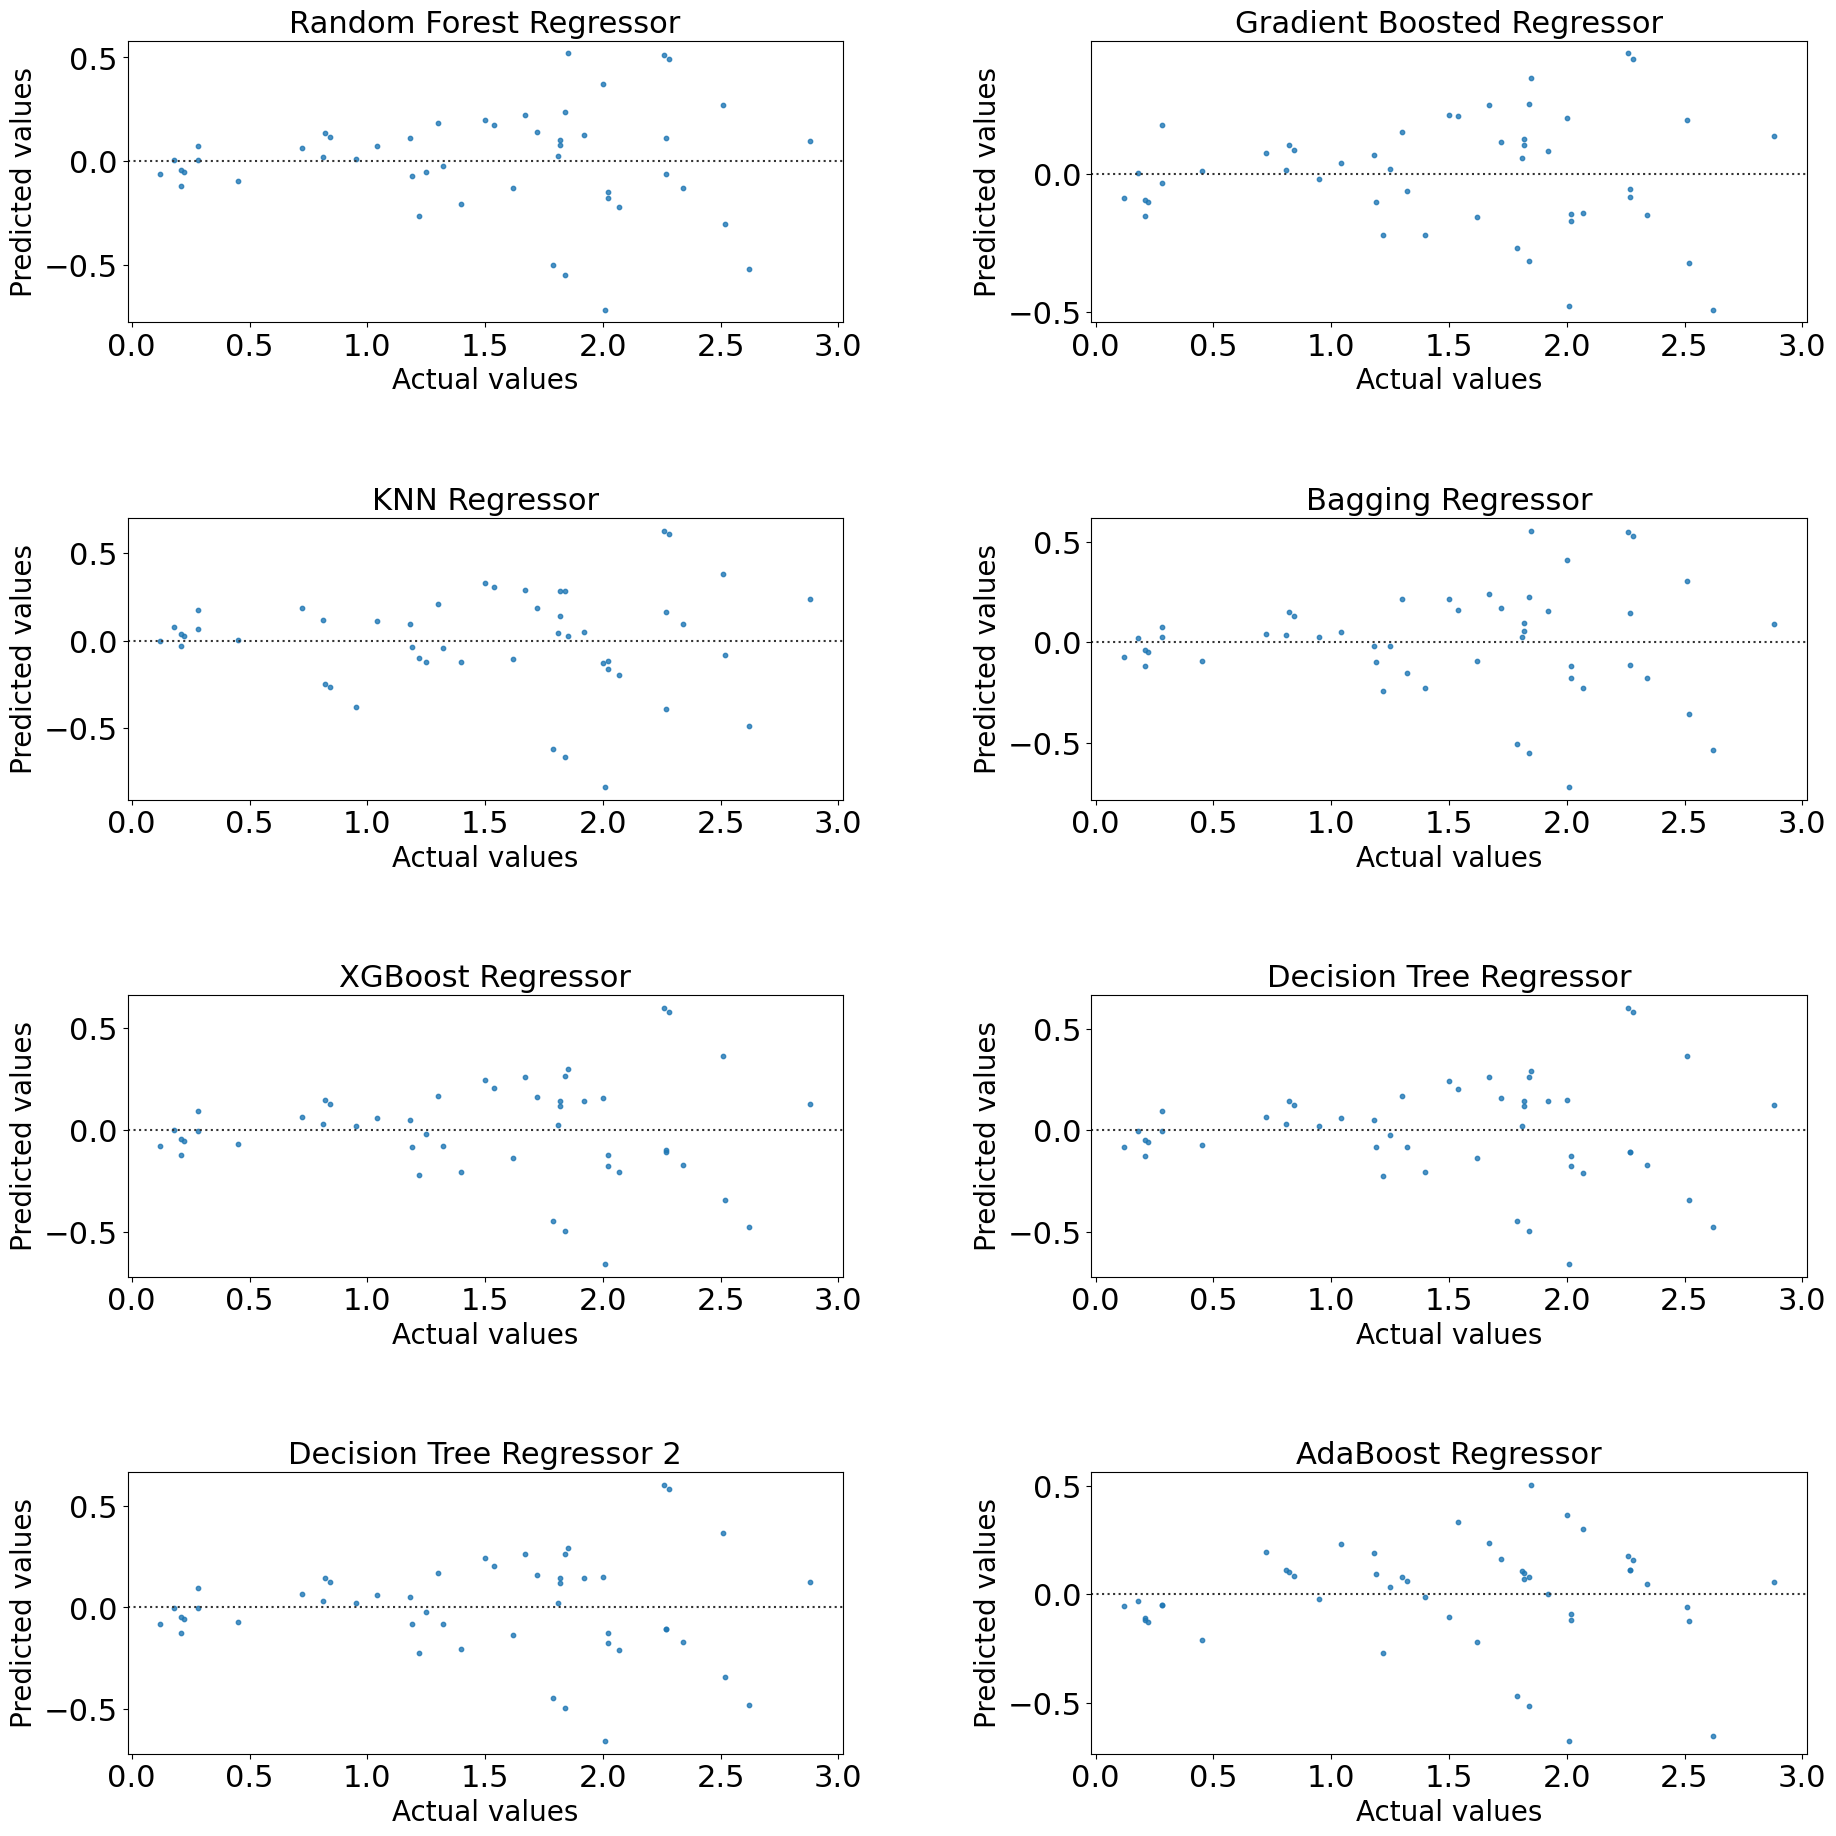

In [410]:
plt.clf()
import seaborn as sns
fig,ax=plt.subplots(4,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model7=DecisionTreeRegressor()
model7.fit(X1_train, y1_train)
y1_pred=model7.predict(X1_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[3,0])
ax[3,0].set_title("Decision Tree Regressor 2")
ax[3,0].set_xlabel("Actual values")
ax[3,0].set_ylabel("Predicted values")

model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[3,1])
ax[3,1].set_title("AdaBoost Regressor")
ax[3,1].set_xlabel("Actual values")
ax[3,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 4 plot 

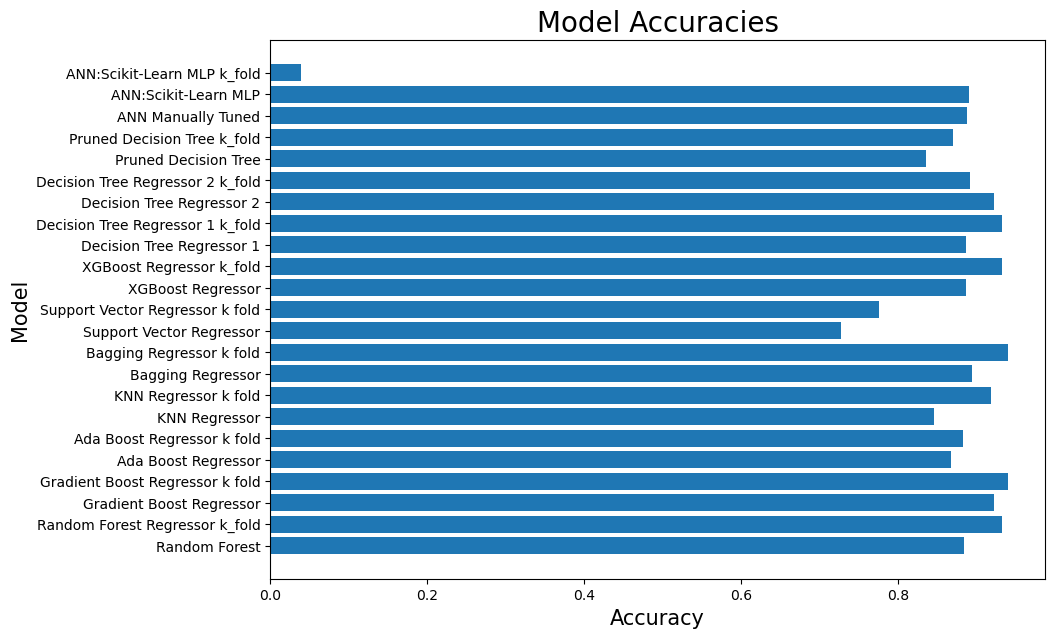

In [411]:
plt.rcdefaults()
models=list(results["Algorithm"])
scores=list(results["accuracy"])
plt.figure(figsize=(10,7))
plt.barh(models[:],scores[:])
plt.ylabel("Model",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.title("Model Accuracies",fontsize=20)
plt.xticklabels=results["Algorithm"]

## Type 5 Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

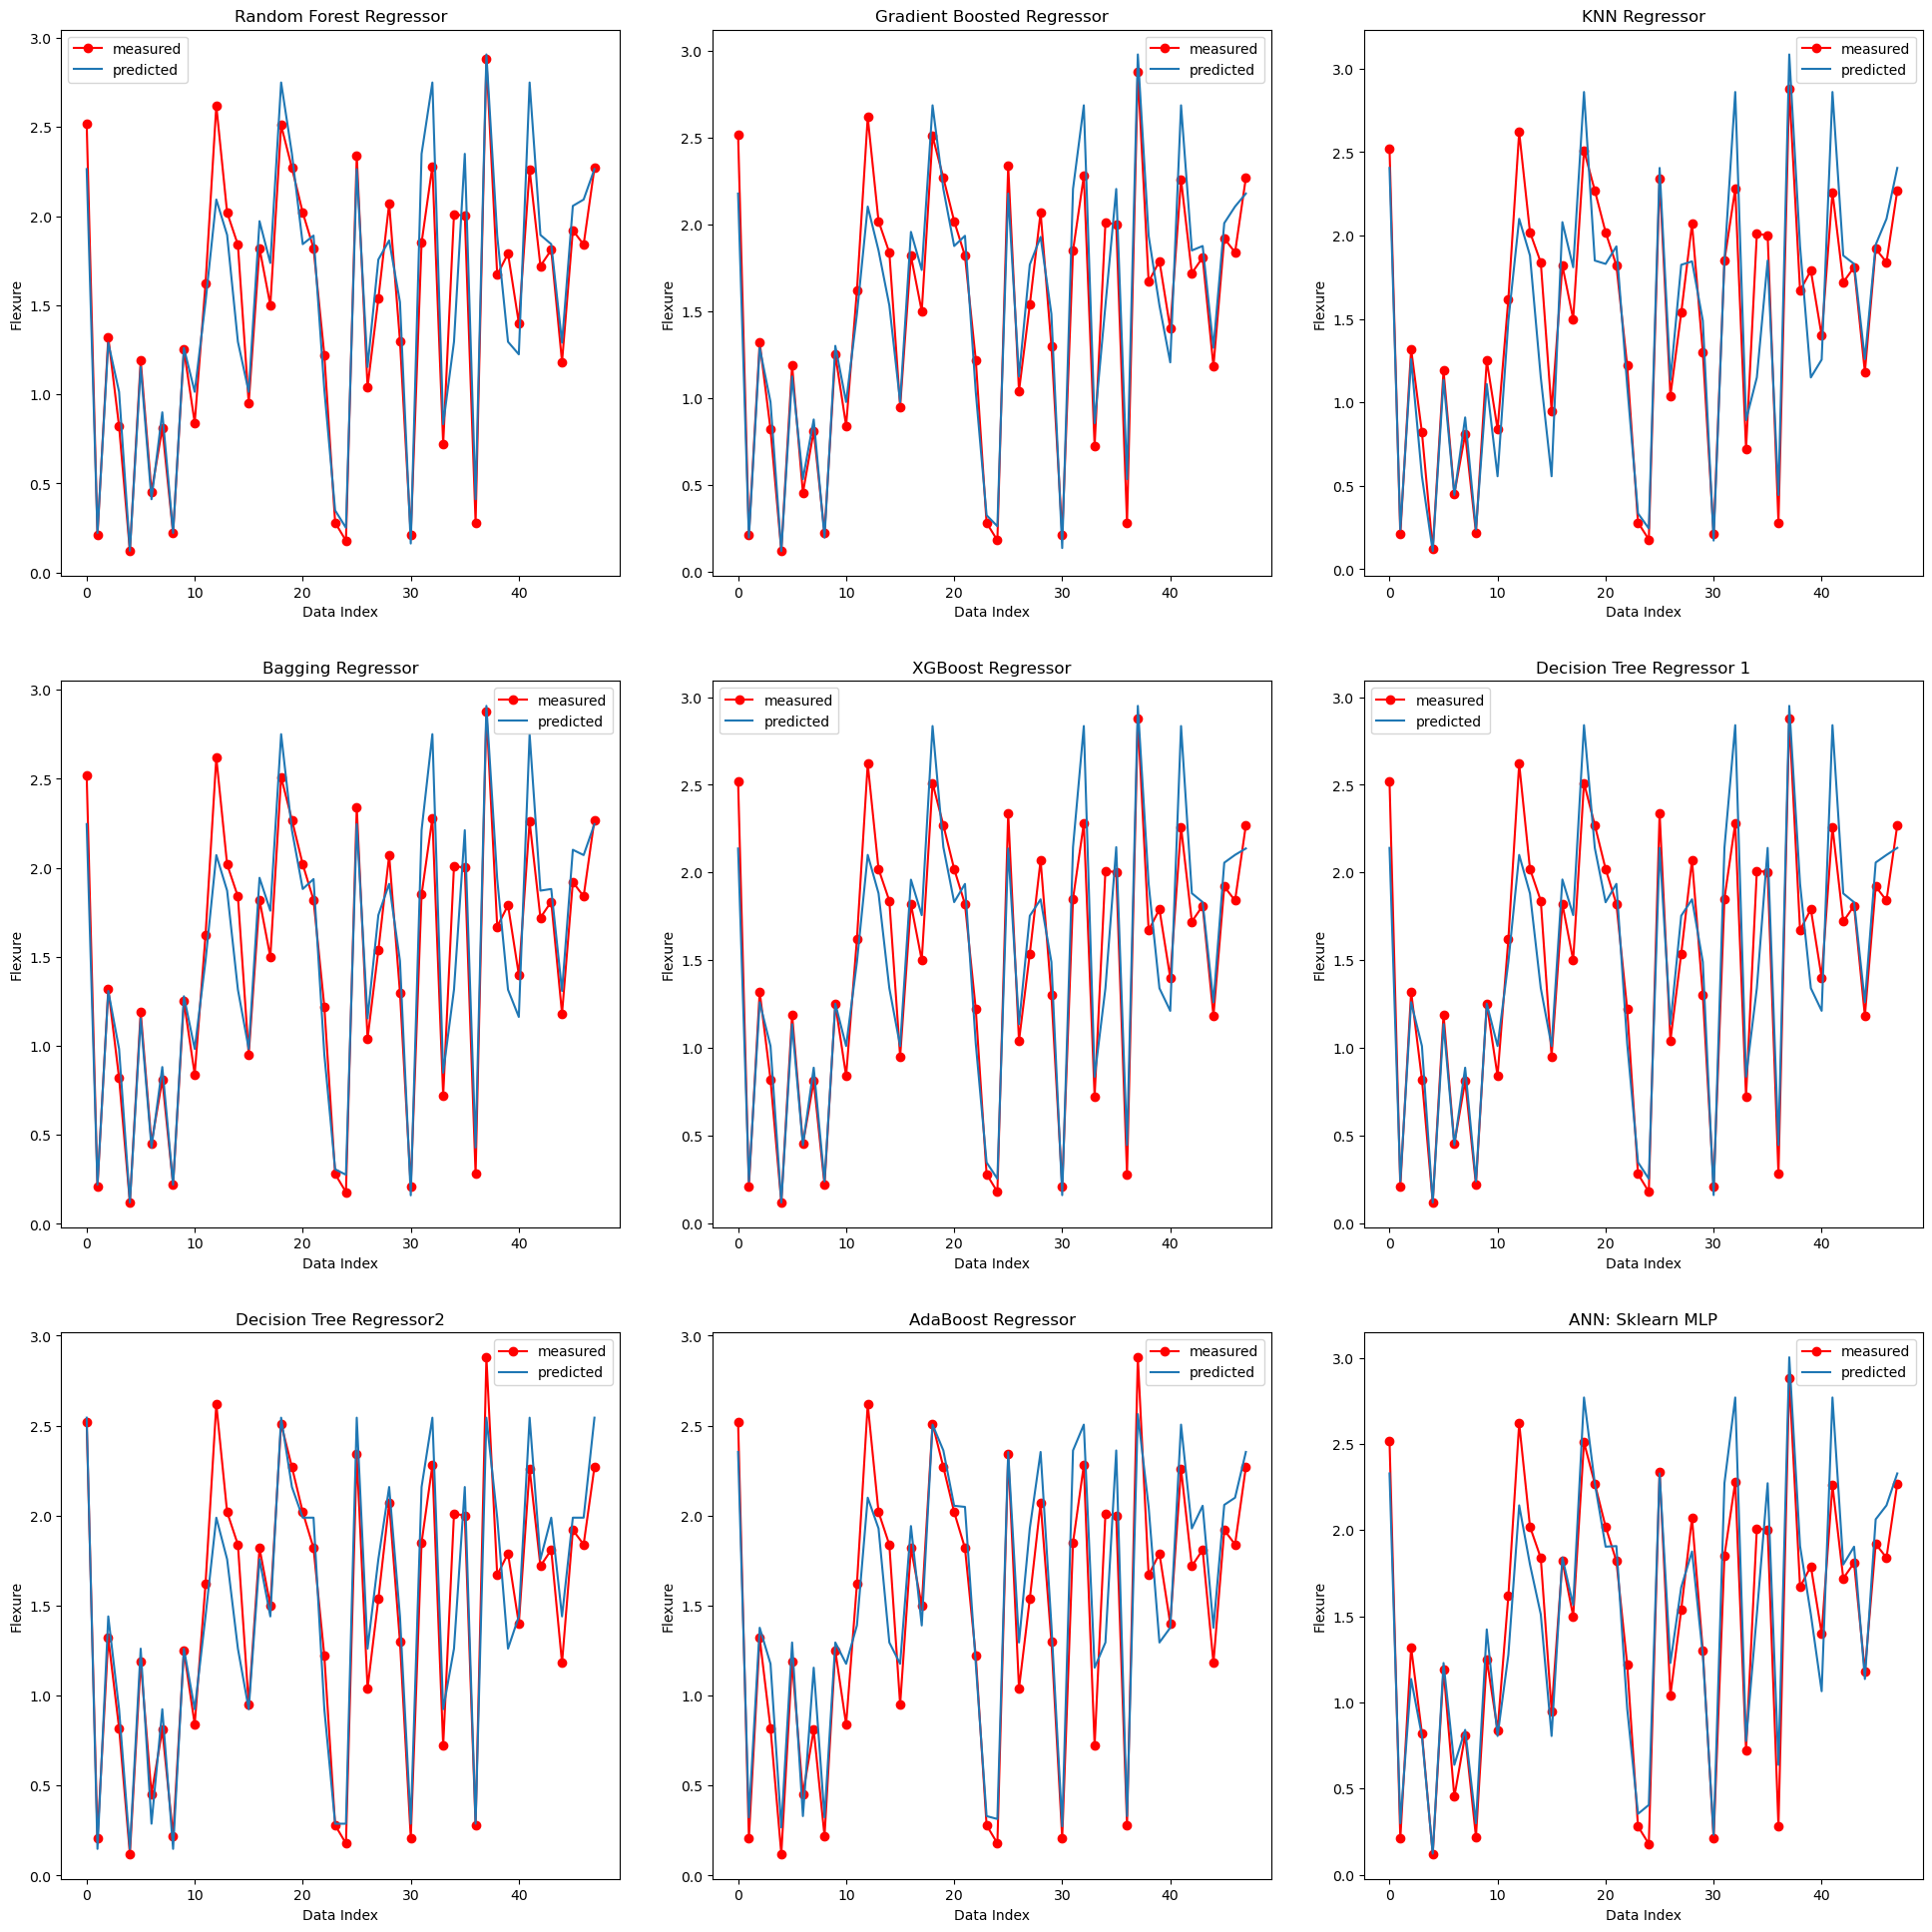

In [413]:
arr=np.arange(48)

plt.clf()
import seaborn as sns
fig,ax=plt.subplots(3,3,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].plot(arr,y_test,"r-o",label="measured")
ax[0,0].plot(arr,y_pred,label="predicted")
ax[0,0].legend()
ax[0,0].set_xlabel("Data Index")
ax[0,0].set_ylabel("Flexure")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].plot(arr,y_test,"r-o",label="measured")
ax[0,1].plot(arr,y_pred,label="predicted")
ax[0,1].legend()
ax[0,1].set_xlabel("Data Index")
ax[0,1].set_ylabel("Flexure")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[0,2].set_title("KNN Regressor")
ax[0,2].plot(arr,y_test,"r-o",label="measured")
ax[0,2].plot(arr,y_pred,label="predicted")
ax[0,2].legend()
ax[0,2].set_xlabel("Data Index")
ax[0,2].set_ylabel("Flexure")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,0].set_title("Bagging Regressor")
ax[1,0].plot(arr,y_test,"r-o",label="measured")
ax[1,0].plot(arr,y_pred,label="predicted")
ax[1,0].legend()
ax[1,0].set_xlabel("Data Index")
ax[1,0].set_ylabel("Flexure")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[1,1].set_title("XGBoost Regressor")
ax[1,1].plot(arr,y_test,"r-o",label="measured")
ax[1,1].plot(arr,y_pred,label="predicted")
ax[1,1].legend()
ax[1,1].set_xlabel("Data Index")
ax[1,1].set_ylabel("Flexure")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[1,2].set_title("Decision Tree Regressor 1")
ax[1,2].plot(arr,y_test,"r-o",label="measured")
ax[1,2].plot(arr,y_pred,label="predicted")
ax[1,2].legend()
ax[1,2].set_xlabel("Data Index")
ax[1,2].set_ylabel("Flexure")

model7=DecisionTreeRegressor()
model7.fit(X1_train,y1_train)
y1_pred=model7.predict(X1_test)
ax[2,0].set_title("Decision Tree Regressor2")
ax[2,0].plot(arr,y1_test,"r-o",label="measured")
ax[2,0].plot(arr,y1_pred,label="predicted")
ax[2,0].legend()
ax[2,0].set_xlabel("Data Index")
ax[2,0].set_ylabel("Flexure")

model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
ax[2,1].set_title("AdaBoost Regressor")
ax[2,1].plot(arr,y_test,"r-o",label="measured")
ax[2,1].plot(arr,y_pred,label="predicted")
ax[2,1].legend()
ax[2,1].set_xlabel("Data Index")
ax[2,1].set_ylabel("Flexure")

model9= MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10000)
model9.fit(X_train, y_train)
y_pred=model9.predict(X_test)
ax[2,2].set_title("ANN: Sklearn MLP")
ax[2,2].plot(arr,y_test,"r-o",label="measured")
ax[2,2].plot(arr,y_pred,label="predicted")
ax[2,2].legend()
ax[2,2].set_xlabel("Data Index")
ax[2,2].set_ylabel("Flexure")

fig.tight_layout(pad=3)